# Bugs Graph

## 필요 라이브러리 로드

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import os, math

In [78]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [79]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [80]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import chromedriver_autoinstaller as ca
import random, time
from datetime import datetime

In [140]:
import glob
import shutil

## 파일 불러오기

In [81]:
site_name = 'bugs'

In [82]:
# 기간 설정
start_date = '2022-05-02'
end_date = '2022-05-08'

In [83]:
code_path = 'c:/data/Wantreez/Crawling/music'
code_path

'c:/data/Wantreez/Crawling/music'

In [84]:
# 실시간 순위 파일 폴더로 이동
live_folder = f'/crawled_data/mod_{site_name}/'
try:
    os.chdir(code_path + live_folder)
except:
    pass

In [85]:
file_list = os.listdir()
for i, s in enumerate(file_list):
    print(i, s)

0 live_bugs_20220422_105549.xlsx
1 live_bugs_20220425_110806.xlsx
2 live_bugs_20220426_110837.xlsx
3 live_bugs_20220427_110836.xlsx
4 live_bugs_20220428_110800.xlsx
5 live_bugs_20220429_110800.xlsx
6 live_bugs_20220430_110800.xlsx
7 live_bugs_20220501_110800.xlsx
8 live_bugs_20220502_110800.xlsx
9 live_bugs_20220503_110800.xlsx
10 live_bugs_20220504_110800.xlsx
11 live_bugs_20220505_110800.xlsx
12 live_bugs_20220506_110800.xlsx
13 live_bugs_20220507_110800.xlsx
14 live_bugs_20220508_110800.xlsx
15 live_bugs_20220509_110800.xlsx
16 live_bugs_20220510_110800.xlsx


## 수집한 파일 모두 합치기

In [86]:
df = pd.DataFrame()
for one in file_list:
    temp = pd.read_excel(one)
    df = pd.concat([df, temp], ignore_index=True)
df.head()

사이트          날짜  순위                     곡            가수  \
0  bugs  2022-04-22   1             LOVE DIVE     IVE (아이브)   
1  bugs  2022-04-22   2                 Seoul        볼빨간사춘기   
2  bugs  2022-04-22   3               그대가 있기에            노을   
3  bugs  2022-04-22   4  봄여름가을겨울 (Still Life)  BIGBANG (빅뱅)   
4  bugs  2022-04-22   5            Love story        볼빨간사춘기   

                     앨범     소속사 소속사_분류  
0             LOVE DIVE     스타쉽    스타쉽  
1                 Seoul  SHOFAR     기타  
2               그대가 있기에   C-JeS     기타  
3  봄여름가을겨울 (Still Life)      YG     YG  
4                 Seoul  SHOFAR     기타

In [87]:
df['날짜'] = df['날짜'].astype(str)

In [88]:
sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
sliced_df.head()

사이트          날짜  순위                                      곡            가수  \
0  bugs  2022-05-02   1  That That (prod. & feat. SUGA of BTS)      싸이 (PSY)   
1  bugs  2022-05-02   2                       감동이야 (feat. 성시경)      싸이 (PSY)   
2  bugs  2022-05-02   3                                  Celeb      싸이 (PSY)   
3  bugs  2022-05-02   4                              LOVE DIVE     IVE (아이브)   
4  bugs  2022-05-02   5                   봄여름가을겨울 (Still Life)  BIGBANG (빅뱅)   

                     앨범       소속사 소속사_분류  
0                   싸다9  P NATION     기타  
1                   싸다9  P NATION     기타  
2                   싸다9  P NATION     기타  
3             LOVE DIVE       스타쉽    스타쉽  
4  봄여름가을겨울 (Still Life)        YG     YG

In [89]:
sliced_df.tail()

사이트          날짜   순위                   곡        가수                   앨범  \
695  bugs  2022-05-08   96   밝게 빛나는 별이 되어 비춰줄게       송이한    밝게 빛나는 별이 되어 비춰줄게   
696  bugs  2022-05-08   97           Love poem   아이유(IU)            Love poem   
697  bugs  2022-05-08   98  Whisky on the Rock       김연지  우리들의 블루스 OST Part 1   
698  bugs  2022-05-08   99                보금자리       임영웅              IM HERO   
699  bugs  2022-05-08  100                 연예인  싸이 (PSY)                   싸집   

          소속사 소속사_분류  
695        개인     기타  
696      EDAM     기타  
697        개인     기타  
698     물고기뮤직     기타  
699  P NATION     기타

In [90]:
sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사이트     700 non-null    object
 1   날짜      700 non-null    object
 2   순위      700 non-null    int64 
 3   곡       700 non-null    object
 4   가수      700 non-null    object
 5   앨범      700 non-null    object
 6   소속사     700 non-null    object
 7   소속사_분류  700 non-null    object
dtypes: int64(1), object(7)
memory usage: 43.9+ KB


In [91]:
sliced_df[sliced_df['소속사'].isna() == True]

Empty DataFrame
Columns: [사이트, 날짜, 순위, 곡, 가수, 앨범, 소속사, 소속사_분류]
Index: []

### 수집한 곡의 유니크

In [16]:
len(sliced_df['곡'].unique())

178

In [17]:
dates = pd.date_range(start_date, end_date)
basic_date_df = pd.DataFrame({'날짜':dates})
basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
basic_date_df

날짜
0  2022-05-02
1  2022-05-03
2  2022-05-04
3  2022-05-05
4  2022-05-06
5  2022-05-07
6  2022-05-08

### 제목과 가수 매칭 값 추출

In [92]:
sort_df = sliced_df[['곡', '가수']]
sort_df

곡            가수
0    That That (prod. & feat. SUGA of BTS)      싸이 (PSY)
1                         감동이야 (feat. 성시경)      싸이 (PSY)
2                                    Celeb      싸이 (PSY)
3                                LOVE DIVE     IVE (아이브)
4                     봄여름가을겨울 (Still Life)  BIGBANG (빅뱅)
..                                     ...           ...
695                      밝게 빛나는 별이 되어 비춰줄게           송이한
696                              Love poem       아이유(IU)
697                     Whisky on the Rock           김연지
698                                   보금자리           임영웅
699                                    연예인      싸이 (PSY)

[700 rows x 2 columns]

In [93]:
sort_df = sort_df.drop_duplicates(['곡', '가수'], ignore_index=True)
sort_df

곡            가수
0    That That (prod. & feat. SUGA of BTS)      싸이 (PSY)
1                         감동이야 (feat. 성시경)      싸이 (PSY)
2                                    Celeb      싸이 (PSY)
3                                LOVE DIVE     IVE (아이브)
4                     봄여름가을겨울 (Still Life)  BIGBANG (빅뱅)
..                                     ...           ...
173                                Sunroof   Nicky Youre
174                          Way Back Home     숀 (SHAUN)
175                           별빛 같은 나의 사랑아           임영웅
176                      밝게 빛나는 별이 되어 비춰줄게           송이한
177                                    연예인      싸이 (PSY)

[178 rows x 2 columns]

### 순위변동 열 추가한 df 생성
* 기본 날짜에 데이터 추가
* nan값 중 곡, 가수, 앨범 명은 해당 가수의 정보로 채우기

In [94]:
song_df_list = []
for i in range(sort_df.shape[0]):
    temp = sort_df.iloc[i, :]
    one_df = sliced_df[(sliced_df['곡'] == temp['곡']) & (sliced_df['가수'] == temp['가수'])].reset_index(drop=True)
    one_df['순위변동'] = - ( one_df['순위'] - one_df['순위'].shift(1) )
    one_df['순위변동'] = one_df['순위변동'].fillna(0)
    one_df['순위변동'] = one_df['순위변동'].astype('int64')
    merged_df = pd.merge(basic_date_df, one_df, how='left', on='날짜')
    site = merged_df['사이트'].value_counts().index[0]
    title = merged_df['곡'].value_counts().index[0]
    artist = merged_df['가수'].value_counts().index[0]
    album = merged_df['앨범'].value_counts().index[0]
    agency = merged_df['소속사'].value_counts().index[0]
    agency_type = merged_df['소속사_분류'].value_counts().index[0]
    merged_df['사이트'] = merged_df['사이트'].fillna(site)
    merged_df['곡'] = merged_df['곡'].fillna(title)
    merged_df['가수'] = merged_df['가수'].fillna(artist)
    merged_df['앨범'] = merged_df['앨범'].fillna(album)
    merged_df['소속사'] = merged_df['소속사'].fillna(agency)
    merged_df['소속사_분류'] = merged_df['소속사_분류'].fillna(agency_type)
    song_df_list.append(merged_df)

In [95]:
merged_df

날짜   사이트     순위    곡        가수  앨범       소속사 소속사_분류  순위변동
0  2022-05-02  bugs    NaN  연예인  싸이 (PSY)  싸집  P NATION     기타   NaN
1  2022-05-03  bugs    NaN  연예인  싸이 (PSY)  싸집  P NATION     기타   NaN
2  2022-05-04  bugs    NaN  연예인  싸이 (PSY)  싸집  P NATION     기타   NaN
3  2022-05-05  bugs    NaN  연예인  싸이 (PSY)  싸집  P NATION     기타   NaN
4  2022-05-06  bugs    NaN  연예인  싸이 (PSY)  싸집  P NATION     기타   NaN
5  2022-05-07  bugs    NaN  연예인  싸이 (PSY)  싸집  P NATION     기타   NaN
6  2022-05-08  bugs  100.0  연예인  싸이 (PSY)  싸집  P NATION     기타   0.0

### 노래 개수

In [96]:
len(song_df_list)

178

## 그래프 테스트

### 노래 선택

In [97]:
song_df_list[16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      7 non-null      object
 1   사이트     7 non-null      object
 2   순위      7 non-null      int64 
 3   곡       7 non-null      object
 4   가수      7 non-null      object
 5   앨범      7 non-null      object
 6   소속사     7 non-null      object
 7   소속사_분류  7 non-null      object
 8   순위변동    7 non-null      int64 
dtypes: int64(2), object(7)
memory usage: 560.0+ bytes


In [98]:
tmp = song_df_list[100]
tmp

날짜   사이트    순위         곡                  가수        앨범  \
0  2022-05-02  bugs   NaN  FEARLESS  LE SSERAFIM (르세라핌)  FEARLESS   
1  2022-05-03  bugs   8.0  FEARLESS  LE SSERAFIM (르세라핌)  FEARLESS   
2  2022-05-04  bugs   7.0  FEARLESS  LE SSERAFIM (르세라핌)  FEARLESS   
3  2022-05-05  bugs  10.0  FEARLESS  LE SSERAFIM (르세라핌)  FEARLESS   
4  2022-05-06  bugs   8.0  FEARLESS  LE SSERAFIM (르세라핌)  FEARLESS   
5  2022-05-07  bugs   8.0  FEARLESS  LE SSERAFIM (르세라핌)  FEARLESS   
6  2022-05-08  bugs   9.0  FEARLESS  LE SSERAFIM (르세라핌)  FEARLESS   

            소속사 소속사_분류  순위변동  
0  SOURCE MUSIC     기타   NaN  
1  SOURCE MUSIC     기타   0.0  
2  SOURCE MUSIC     기타   1.0  
3  SOURCE MUSIC     기타  -3.0  
4  SOURCE MUSIC     기타   2.0  
5  SOURCE MUSIC     기타   0.0  
6  SOURCE MUSIC     기타  -1.0

In [99]:
tmp['곡'].value_counts().index.values[0]

'FEARLESS'

In [100]:
tmp['가수'].value_counts().index.values[0]

'LE SSERAFIM (르세라핌)'

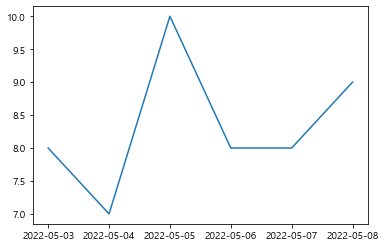

In [101]:
plt.plot(tmp['날짜'], tmp['순위'])

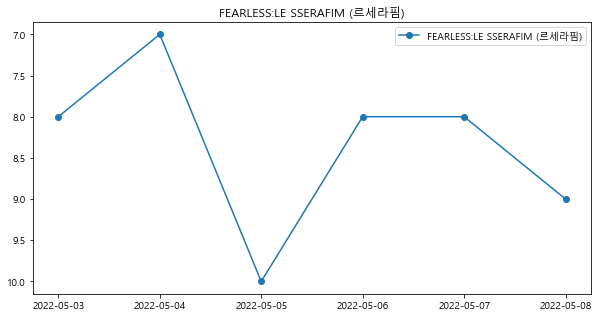

In [102]:
title = tmp['곡'].value_counts().index.values[0]
artist = tmp['가수'].value_counts().index.values[0]
song_label = title + ':' + artist

plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.plot(tmp['날짜'], tmp['순위'], '-o', label=song_label)
plt.title(song_label)
plt.legend()
plt.show()

In [103]:
temp_df = song_df_list[70:91]

### 그래프

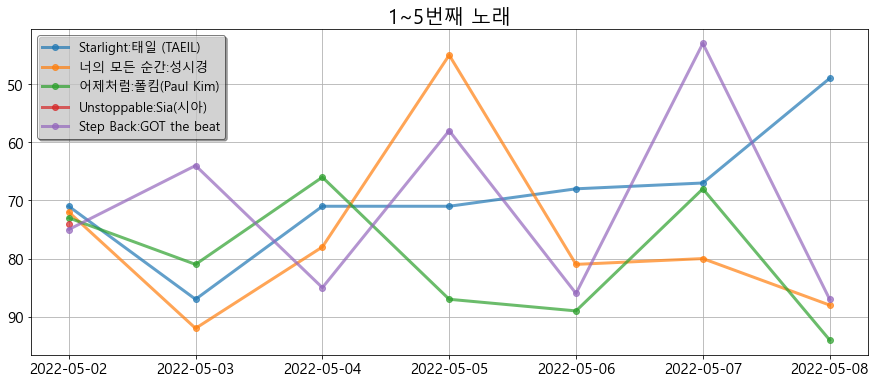

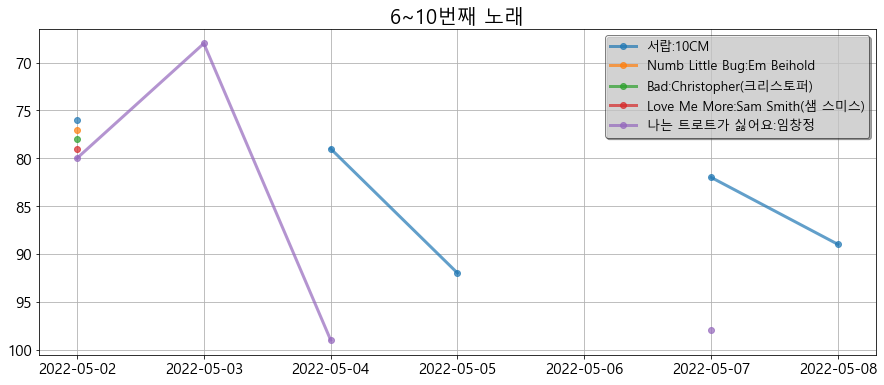

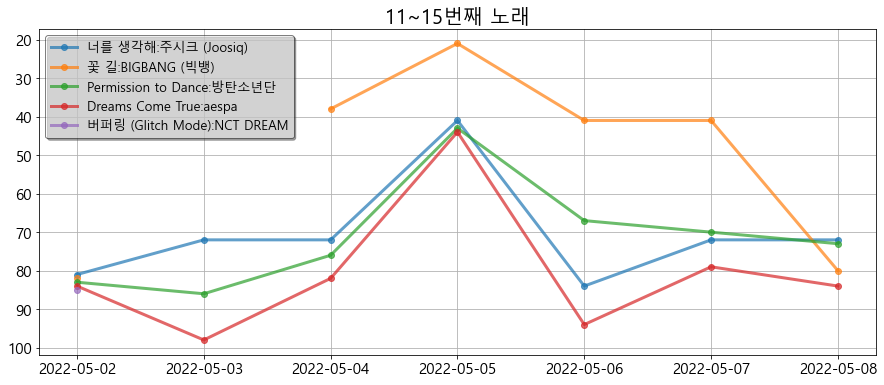

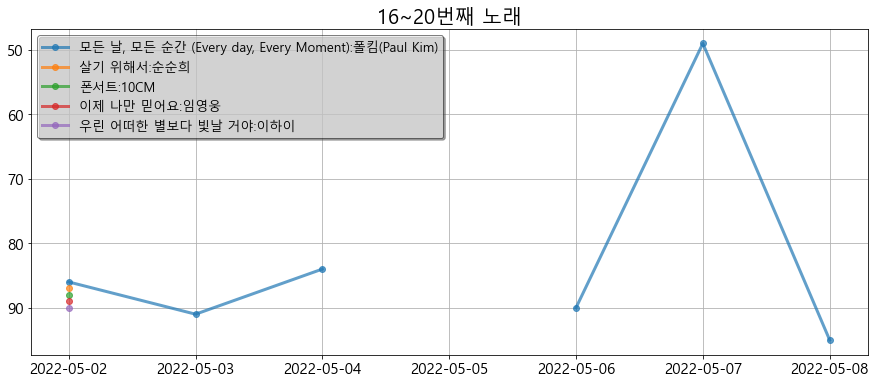

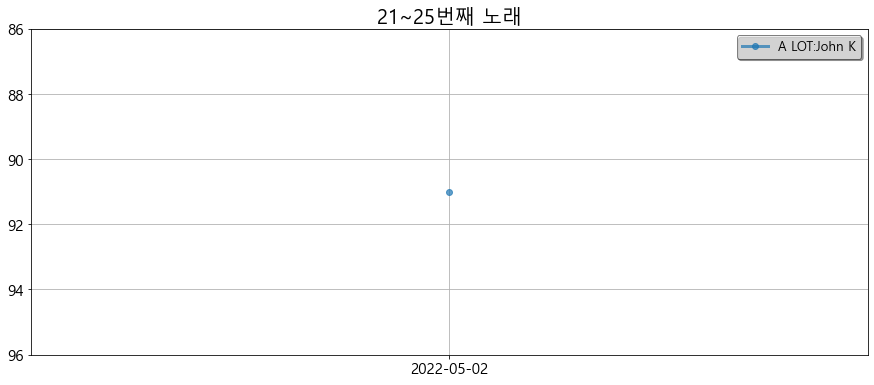

In [104]:
number = 5
t = 0
for i in range( math.ceil(len(temp_df)/number) ):
    plt.figure( figsize=(15, 6) )
    ax = plt.axes()
    ax.invert_yaxis()
    graph_df = temp_df[i*number:(i+1)*number]
    for one in graph_df:
        title = one['곡'].value_counts().index.values[0]
        artist = one['가수'].value_counts().index.values[0]
        song_label = title + ':' + artist
        plt.plot(one['날짜'], one['순위'], '-o', label=song_label, alpha=0.7, linewidth=3)
    t =  t + number
    plt.grid(True)
    plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(framealpha=0.5, frameon=True, shadow=True, edgecolor='k', fontsize=13)
    plt.show()

## 몇 개씩 묶어서 노래 시각화

### 순위 그래프

In [105]:
def rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 8) )
        ax = plt.axes()
        ax.invert_yaxis()
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위'], '-o', label=song_label, linewidth=3, alpha=0.7)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

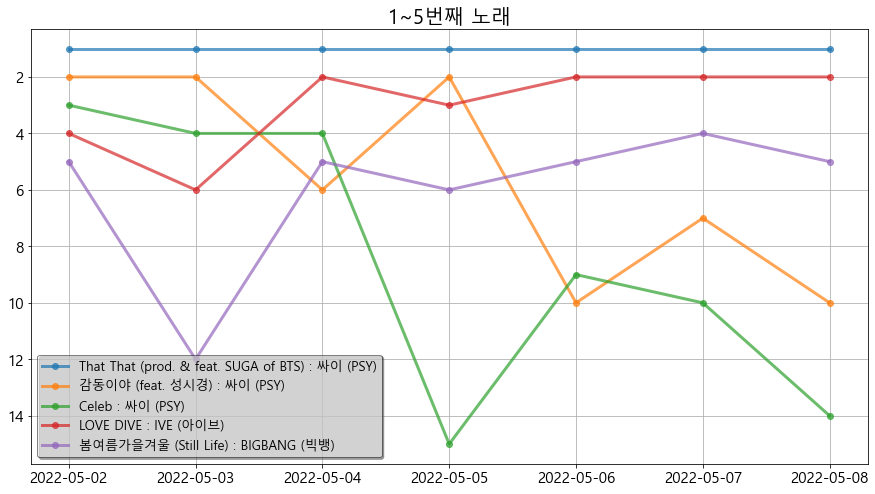

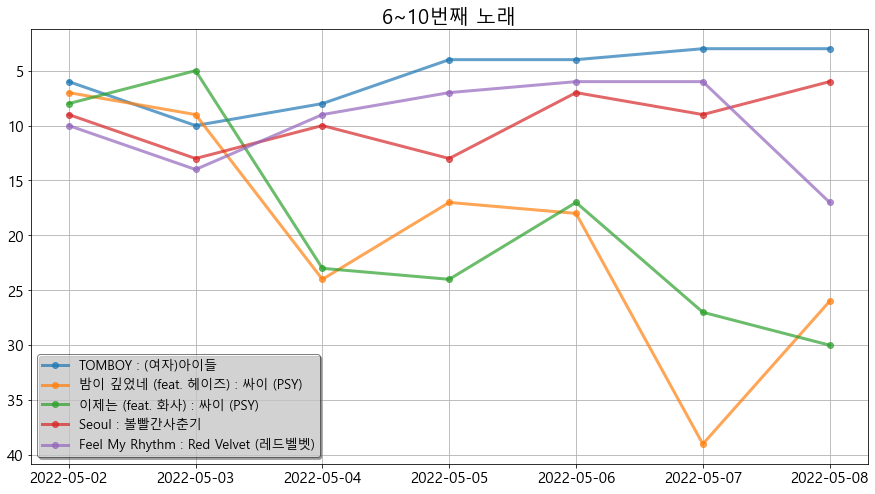

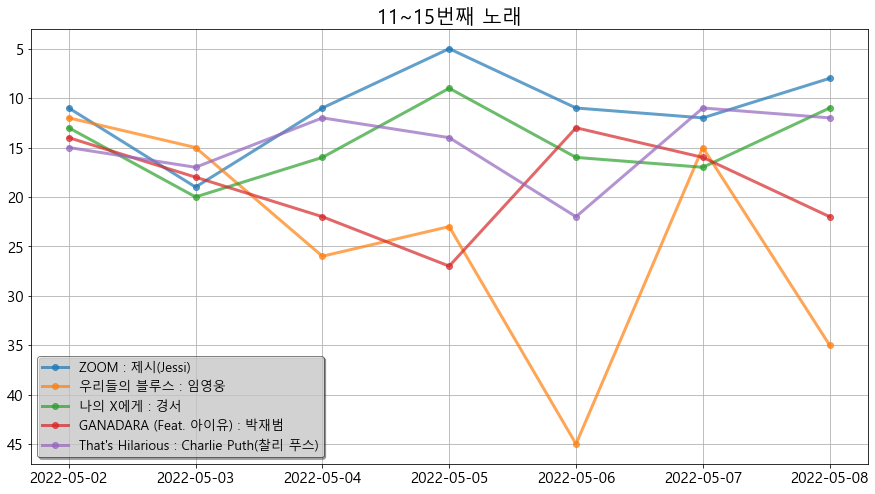

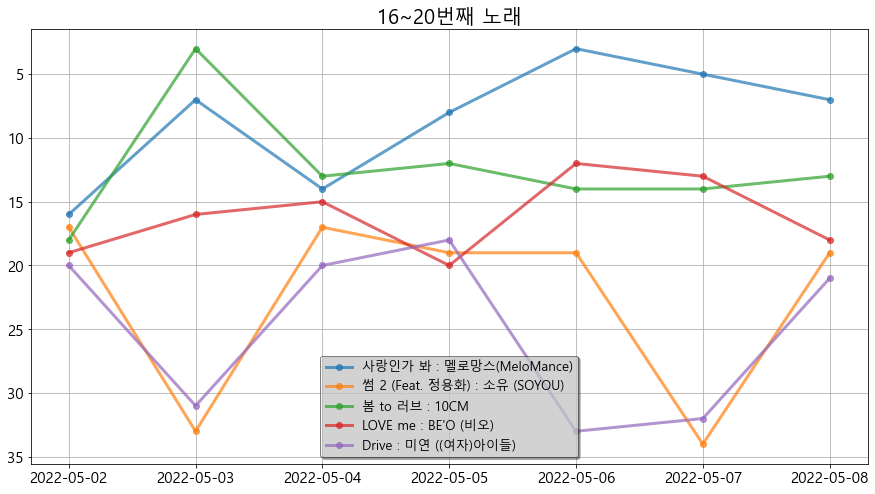

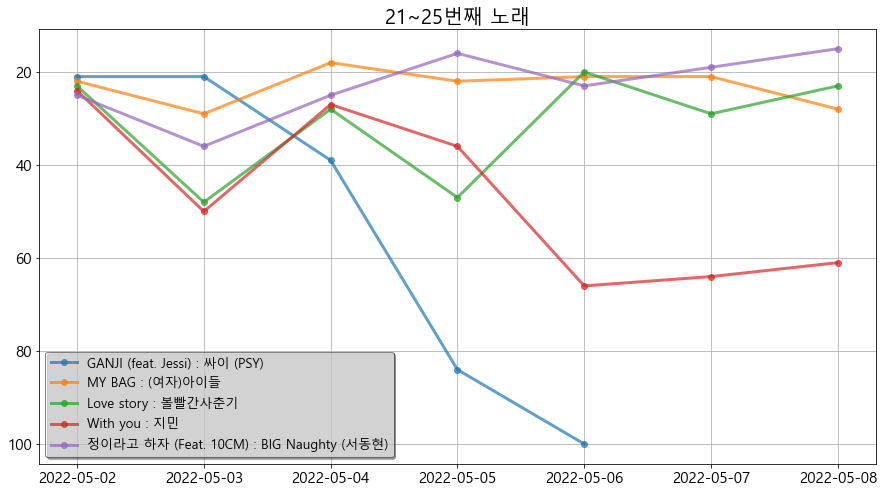

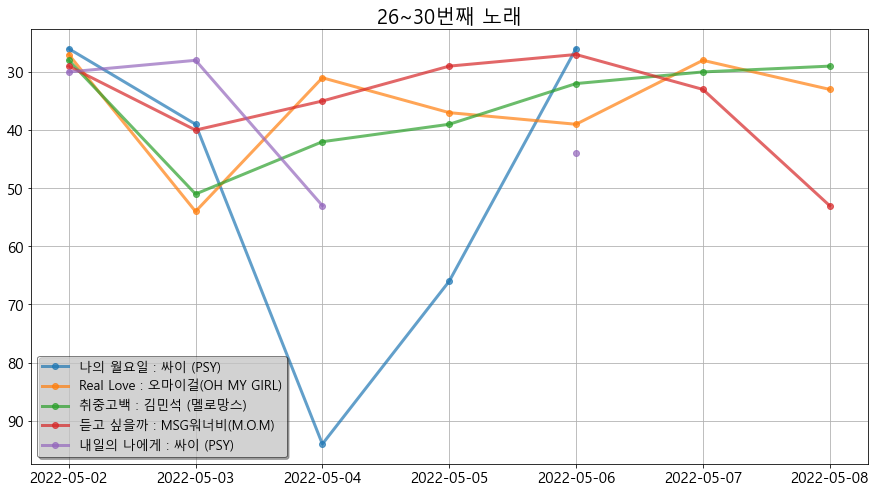

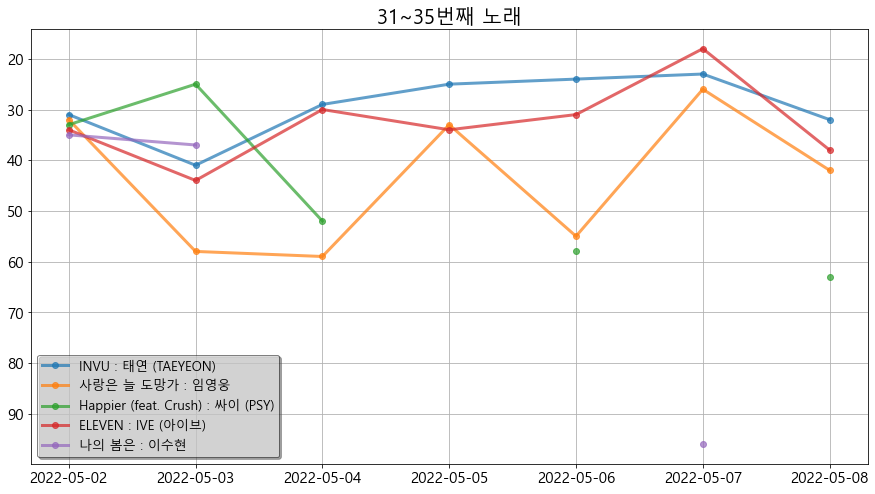

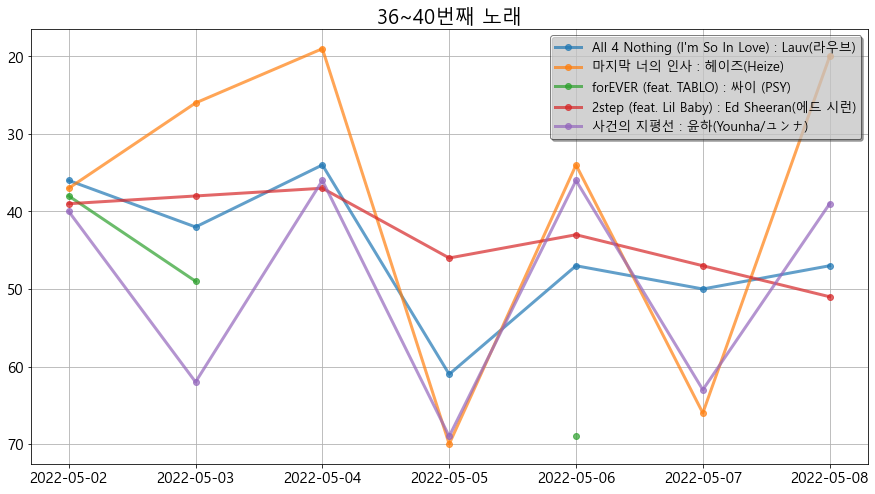

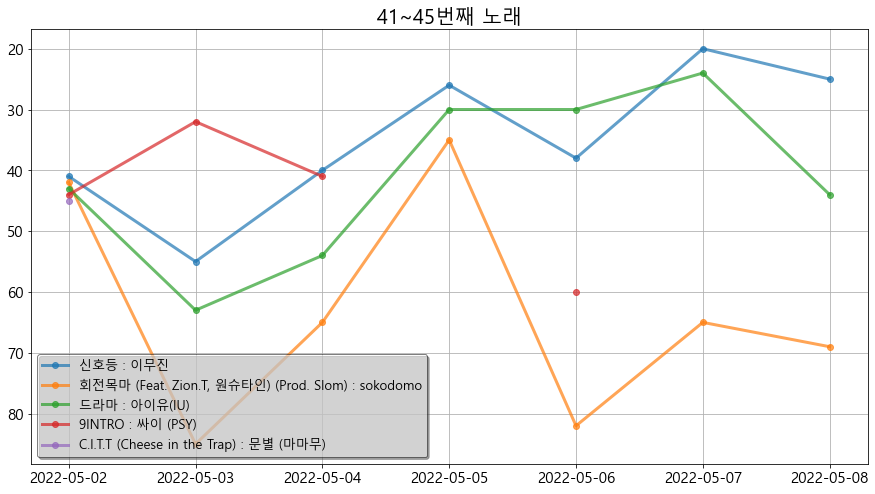

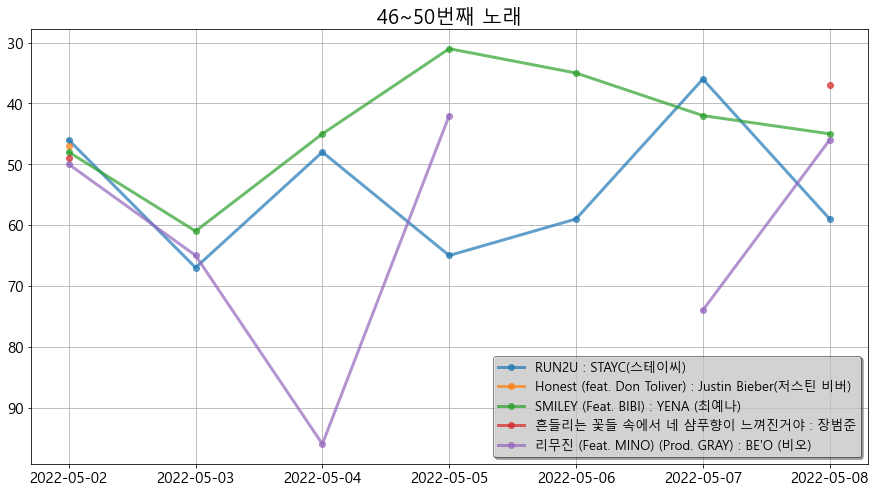

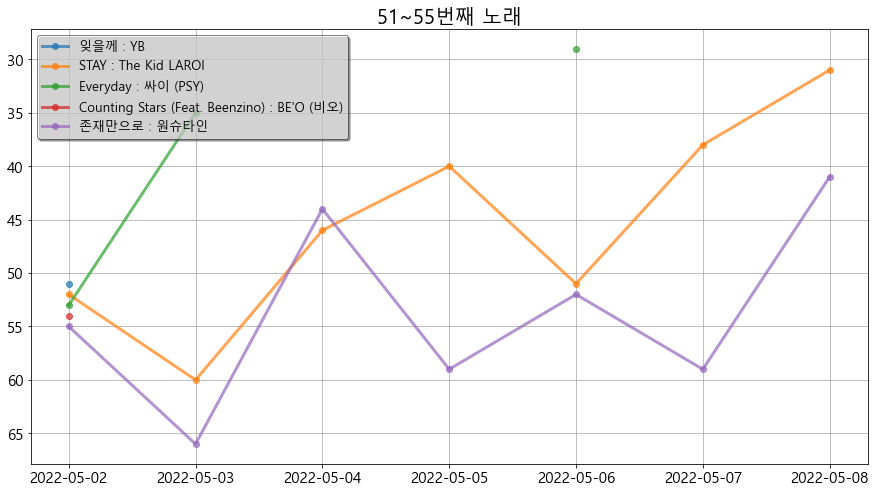

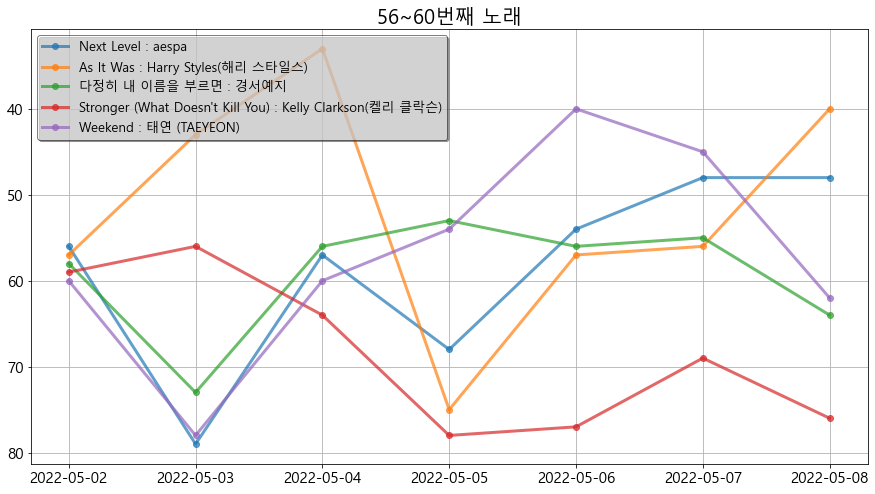

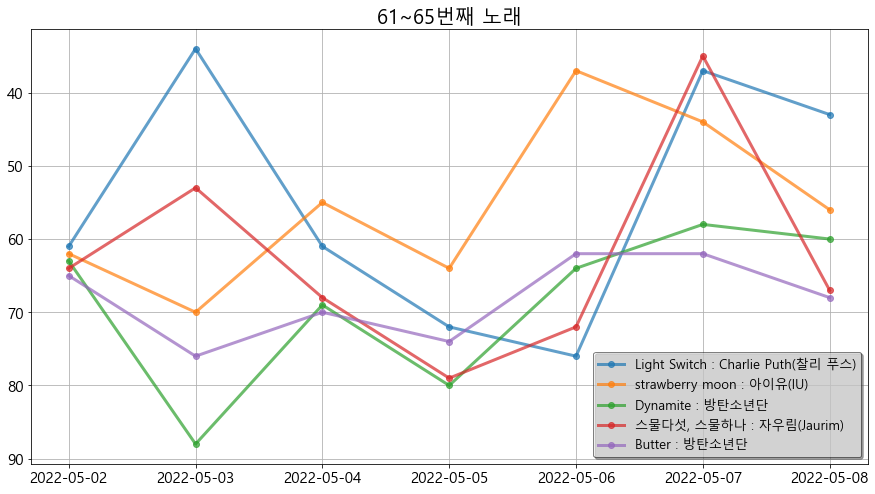

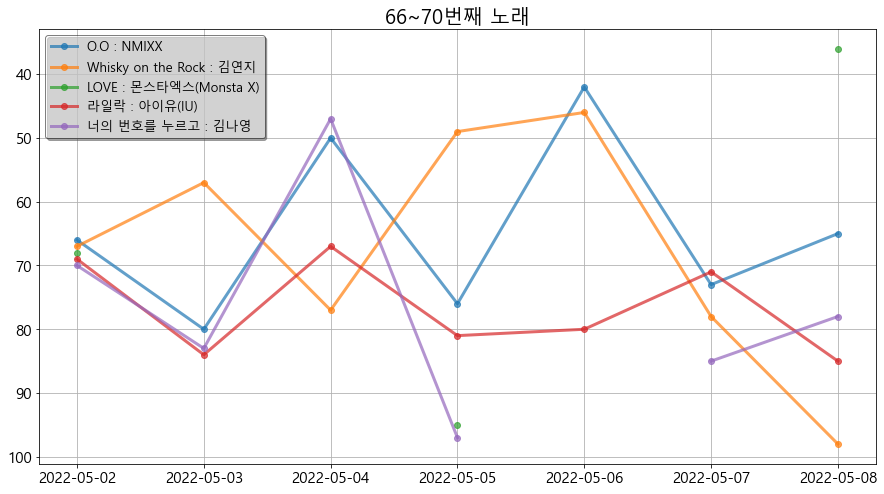

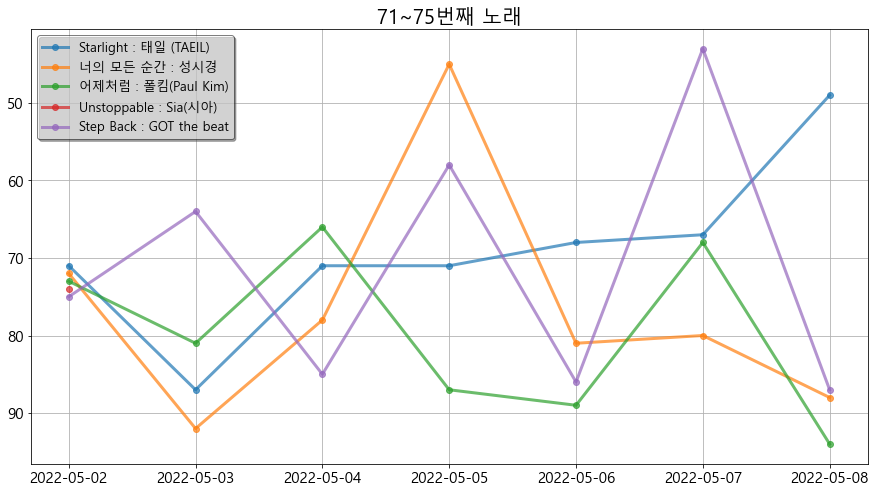

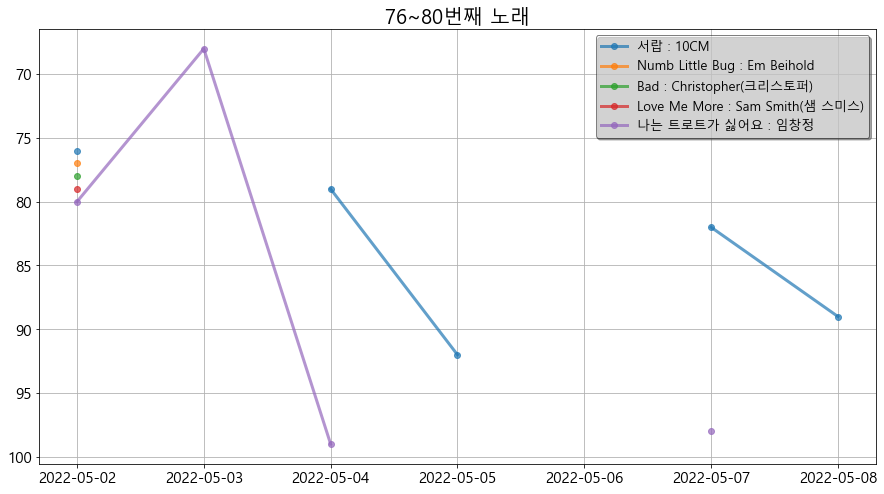

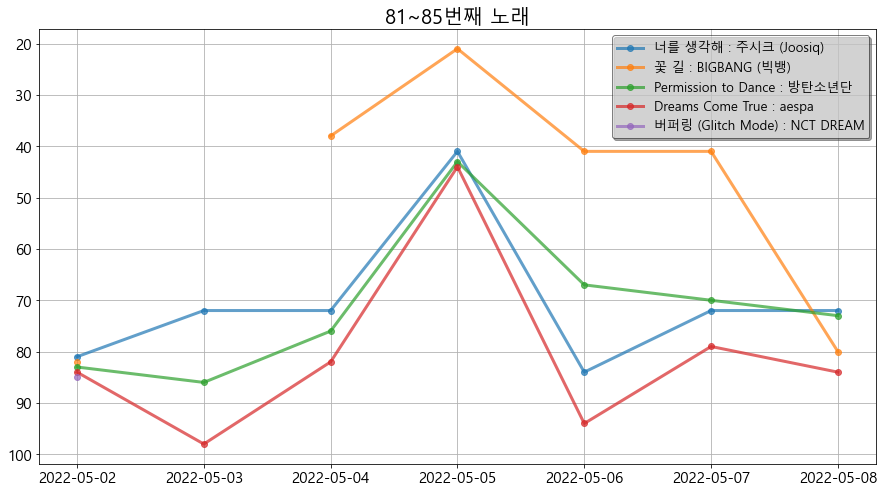

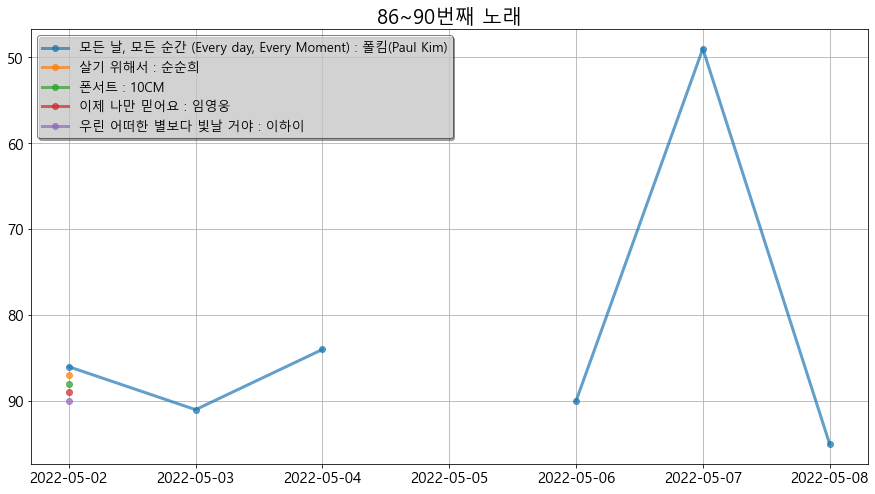

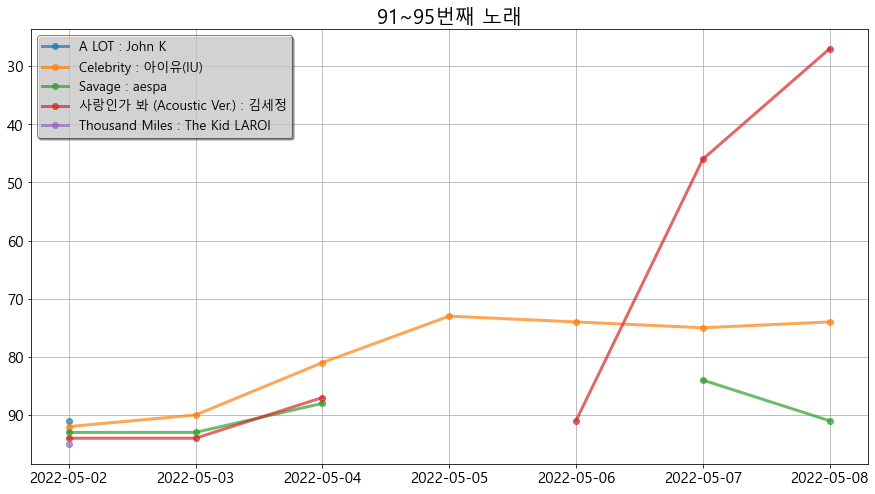

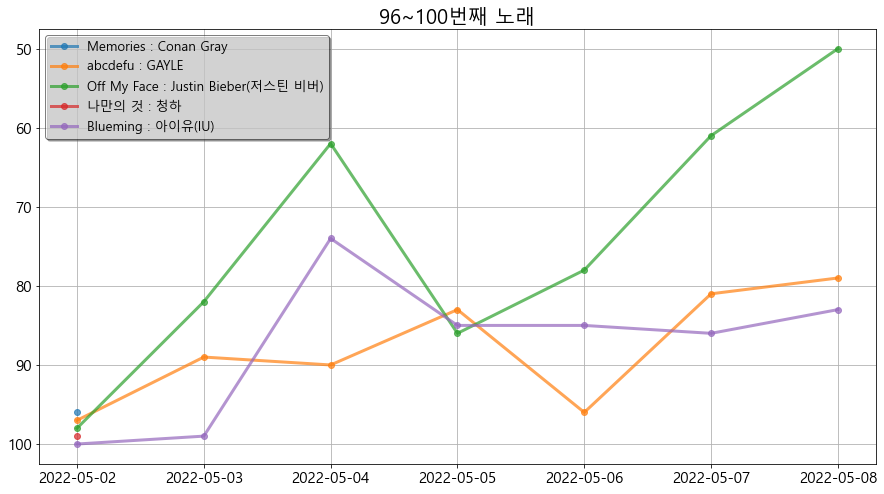

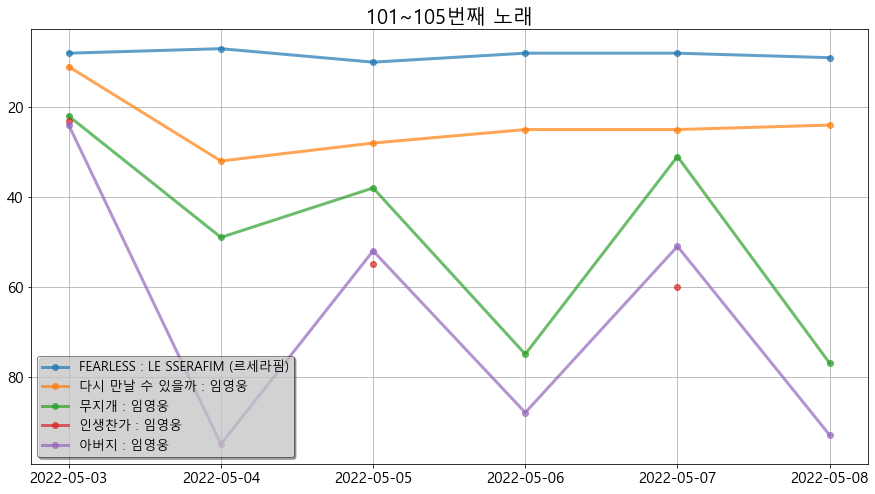

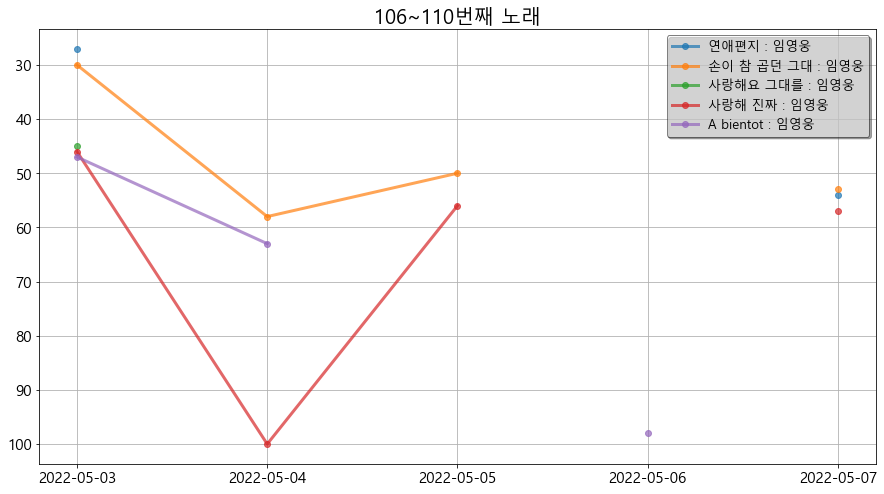

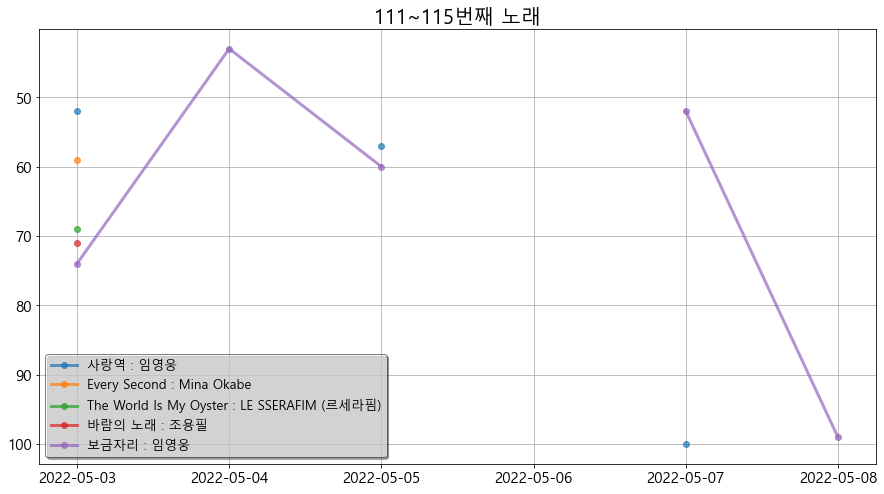

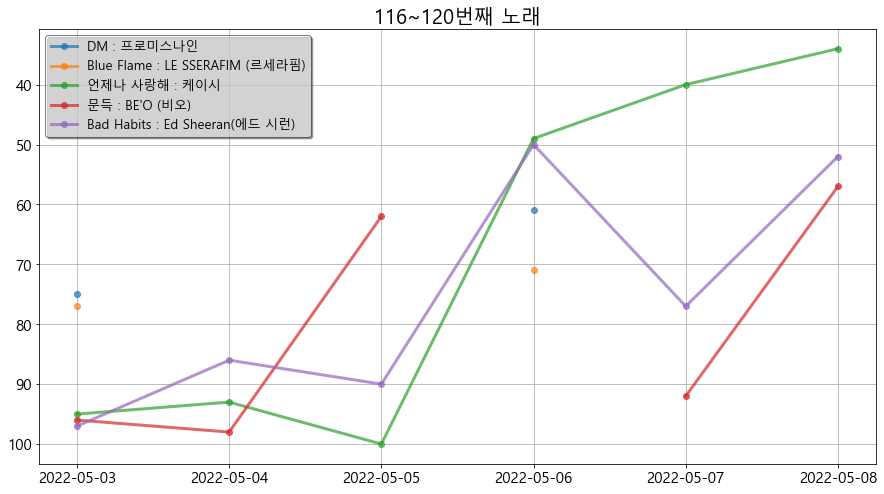

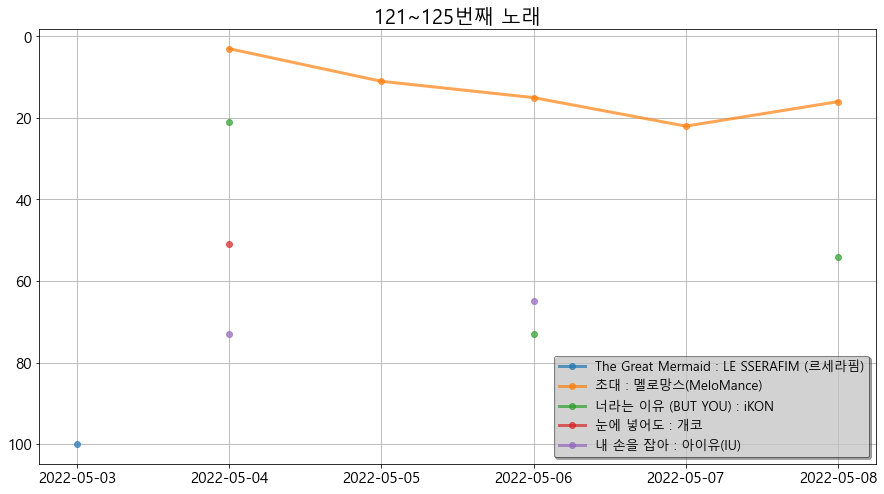

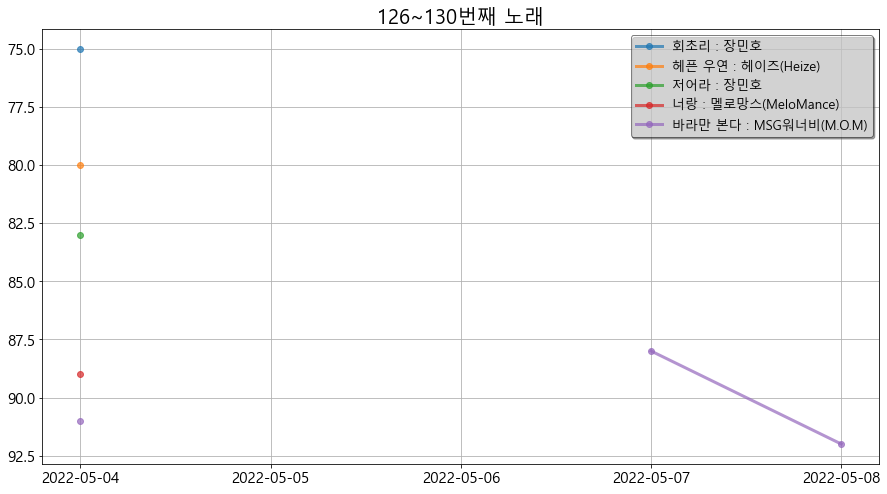

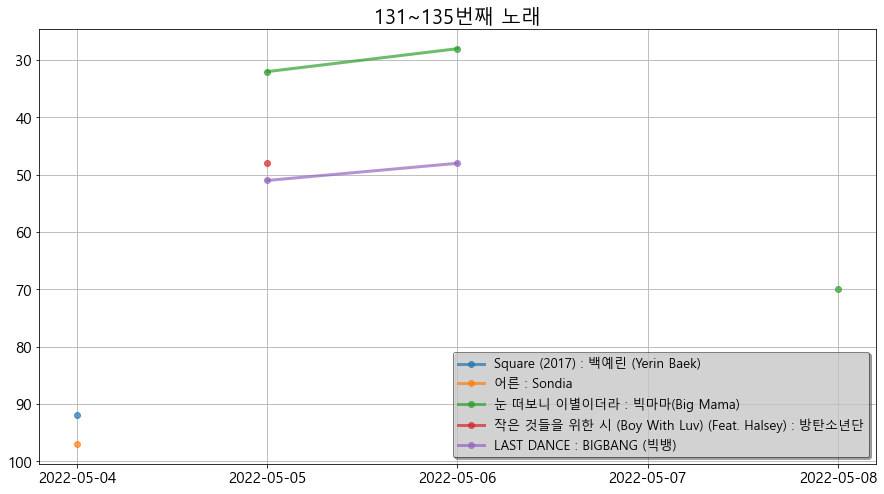

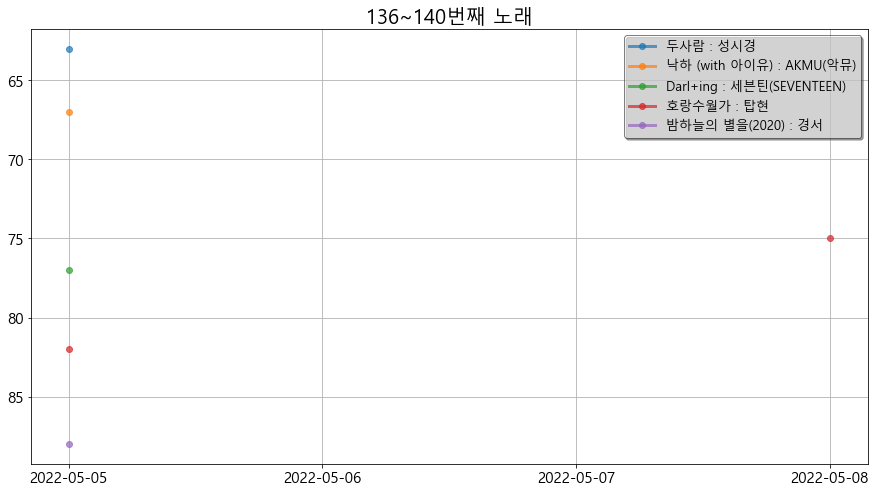

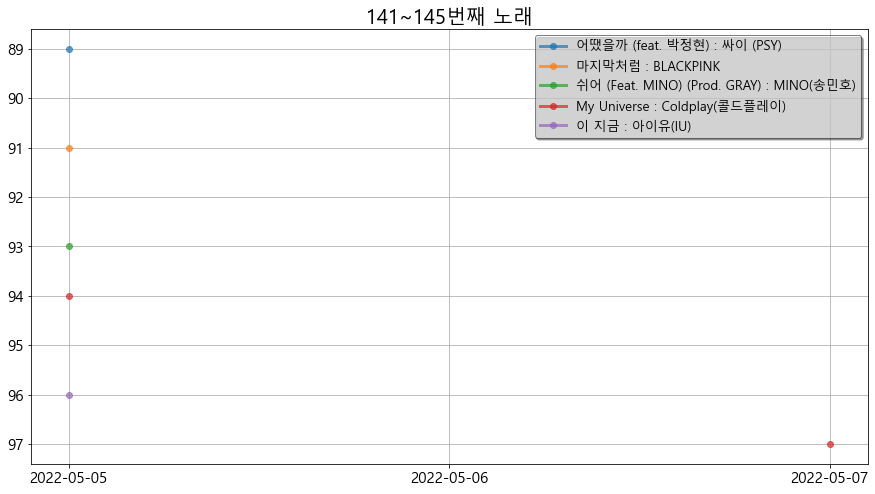

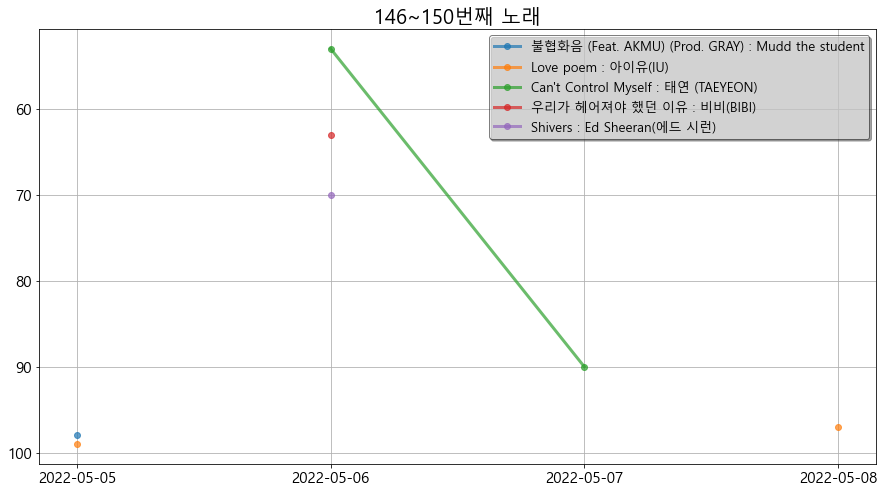

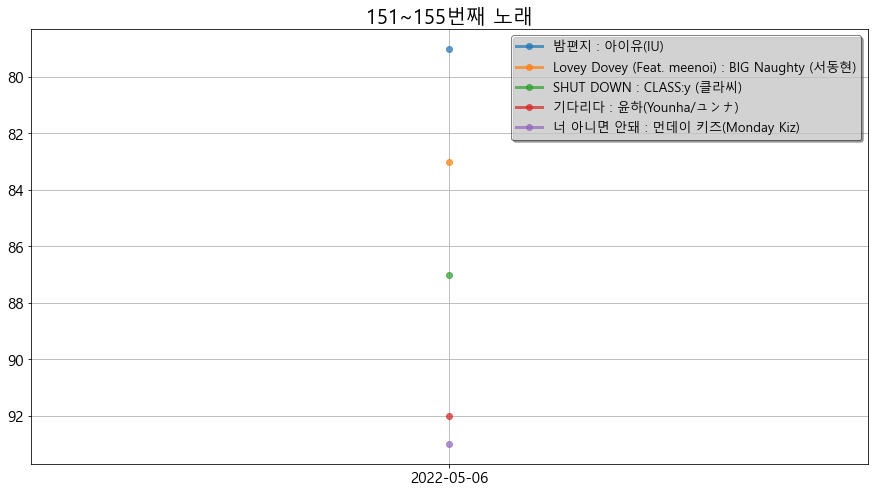

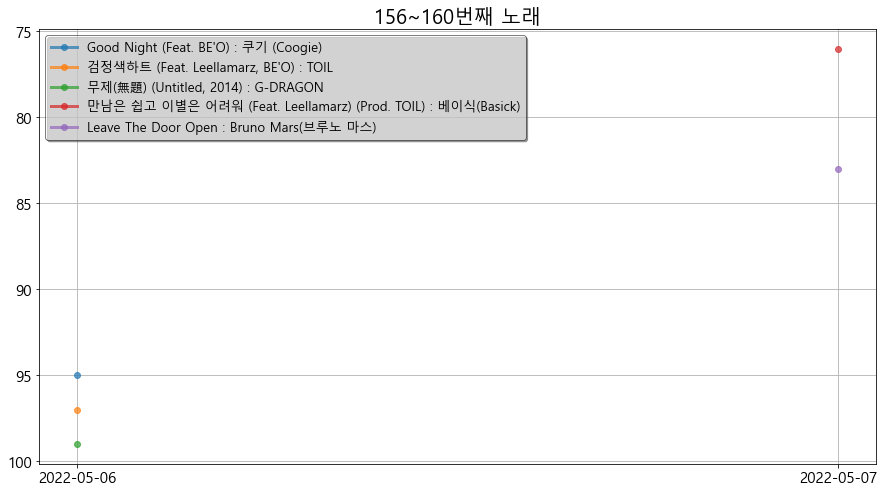

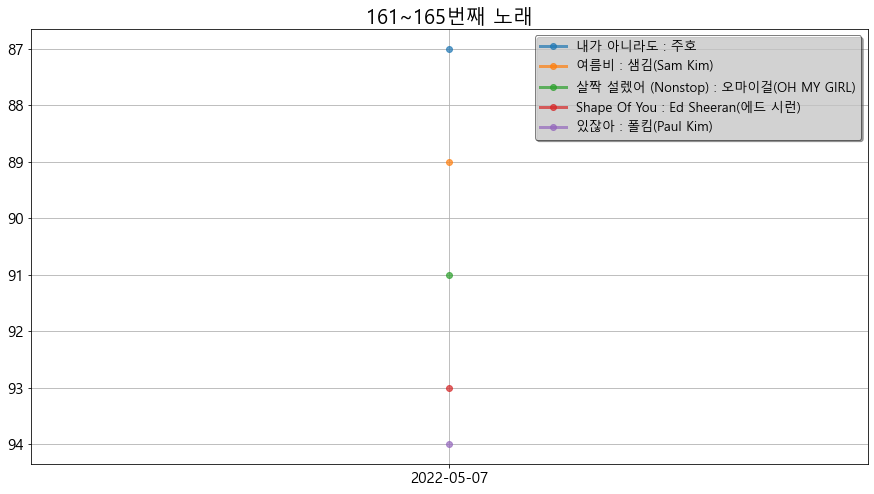

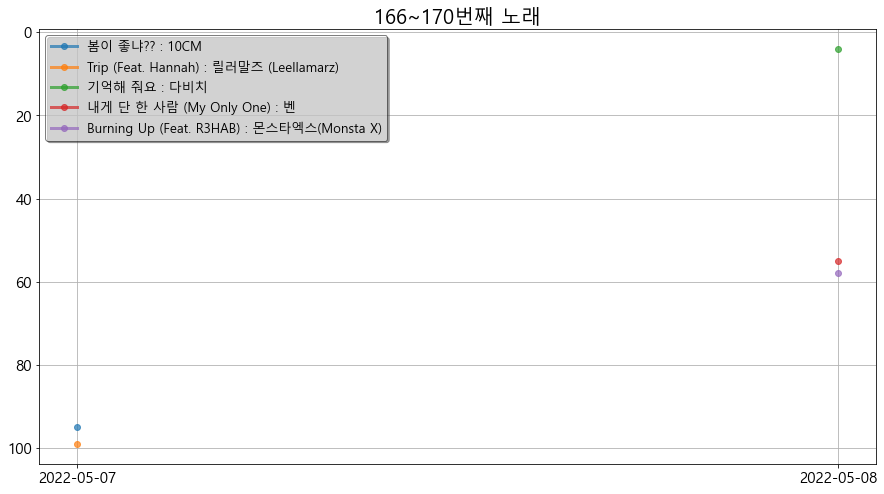

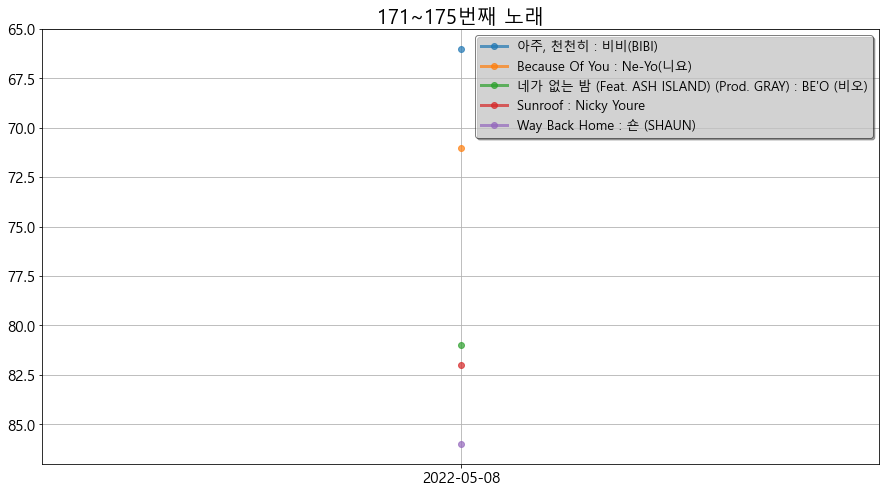

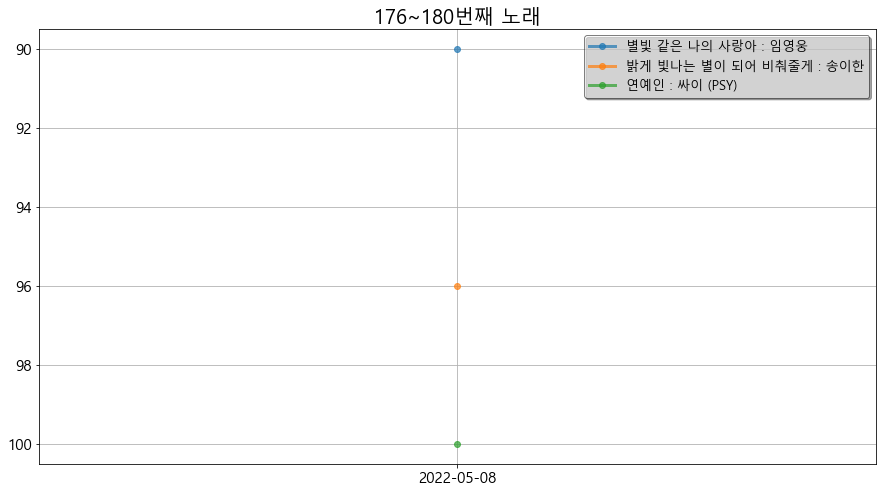

In [106]:
rank_graph(song_df_list, 5)

### 순위 변동 그래프

In [107]:
def change_rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 6) )
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위변동'], '-o', label=song_label, alpha=0.7, linewidth=3)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

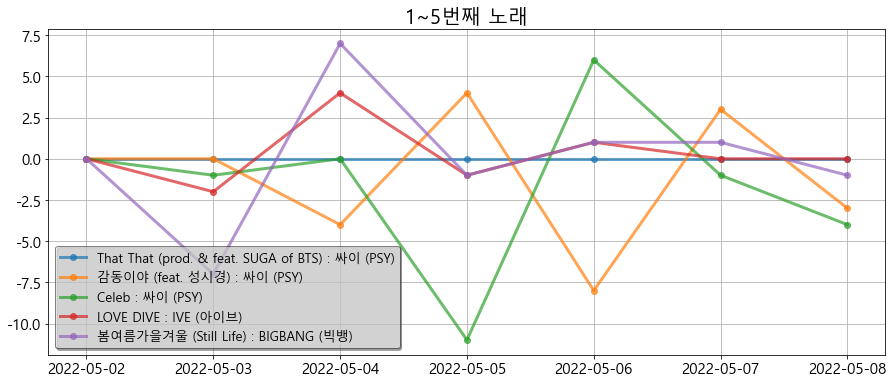

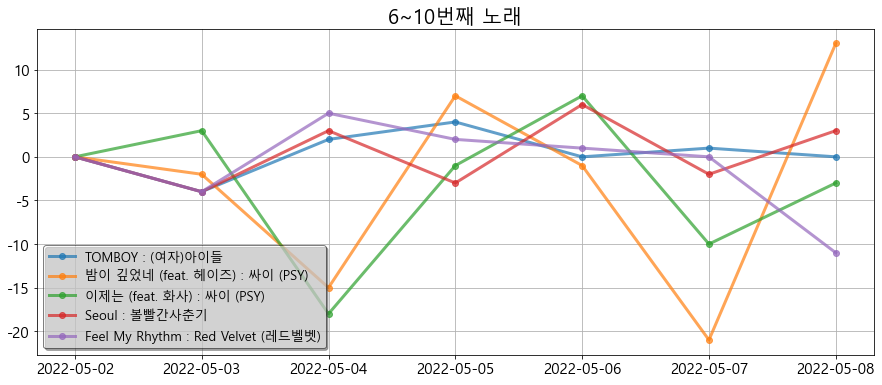

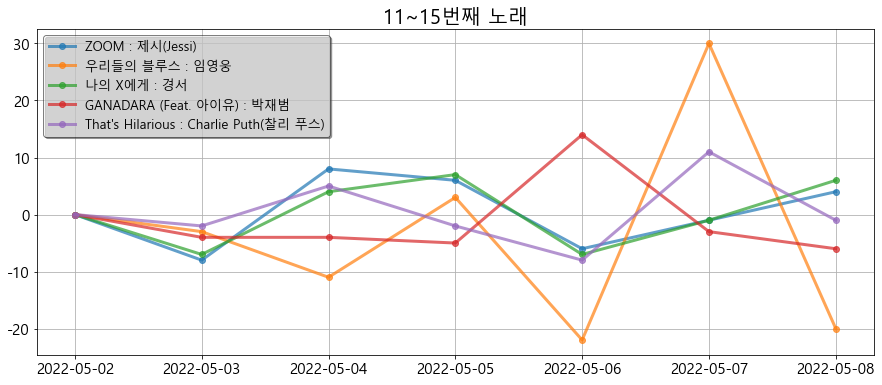

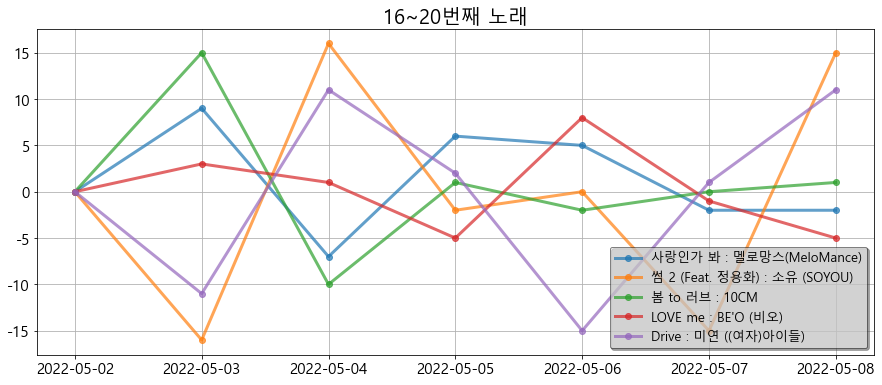

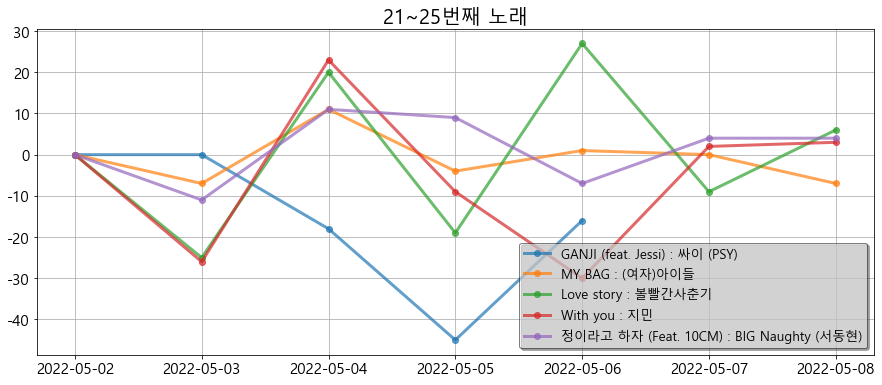

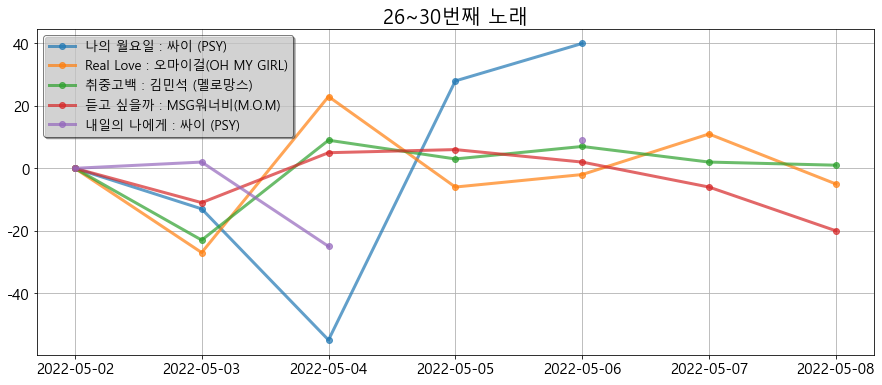

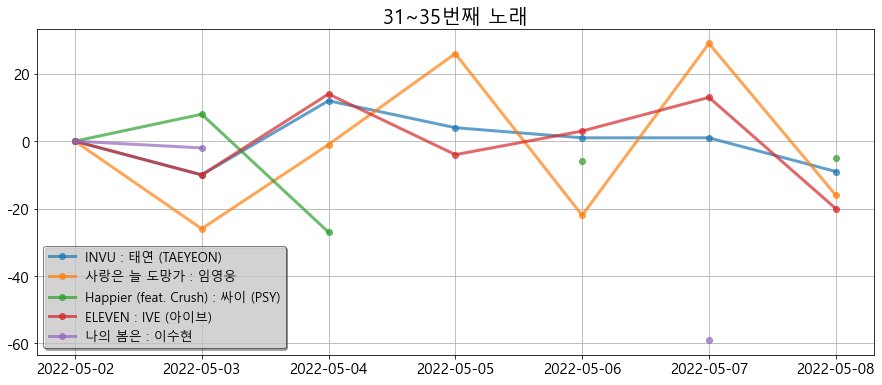

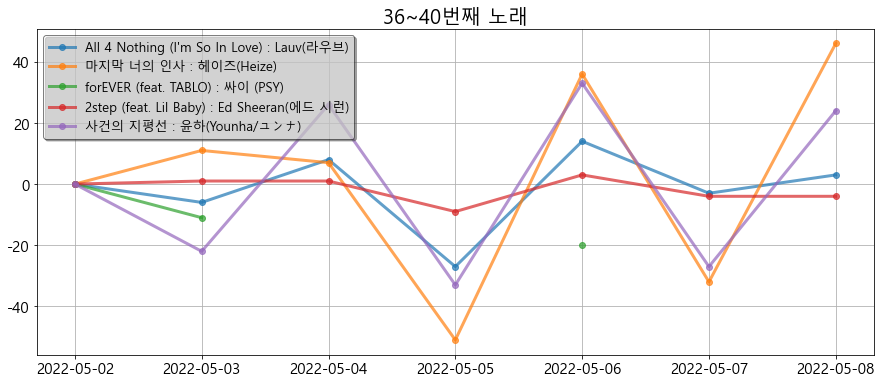

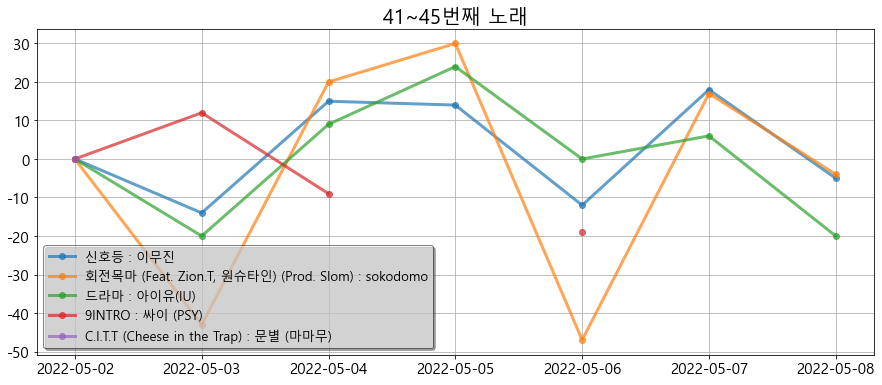

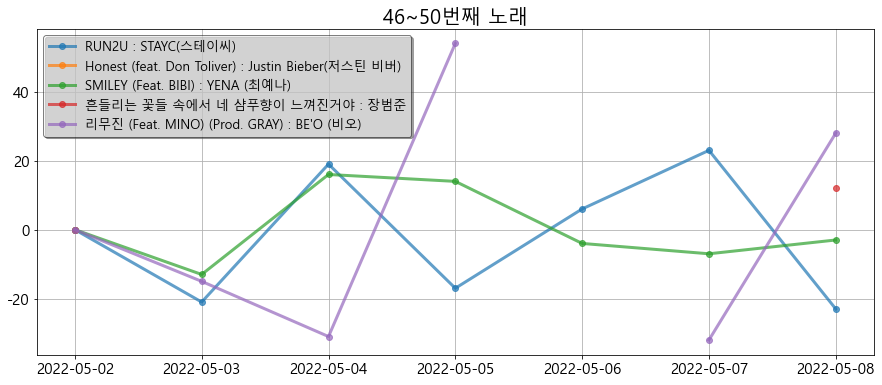

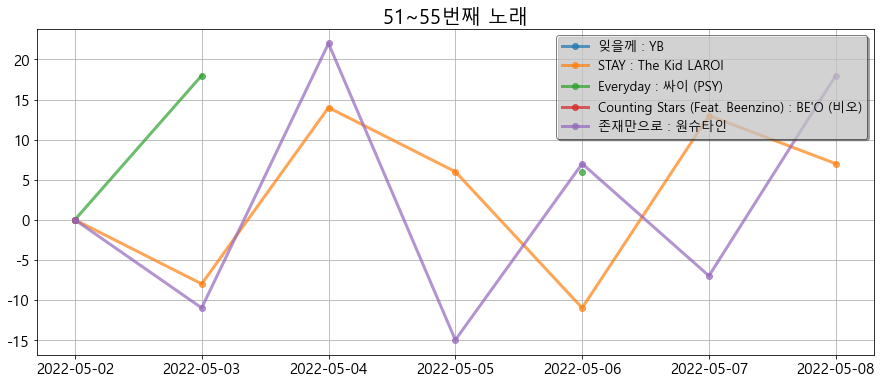

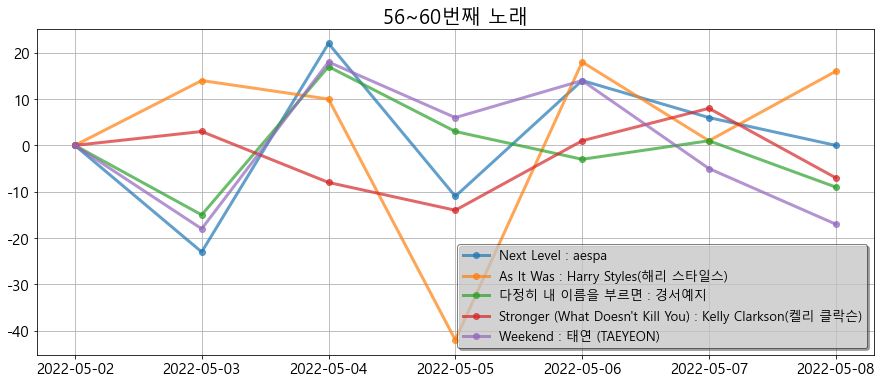

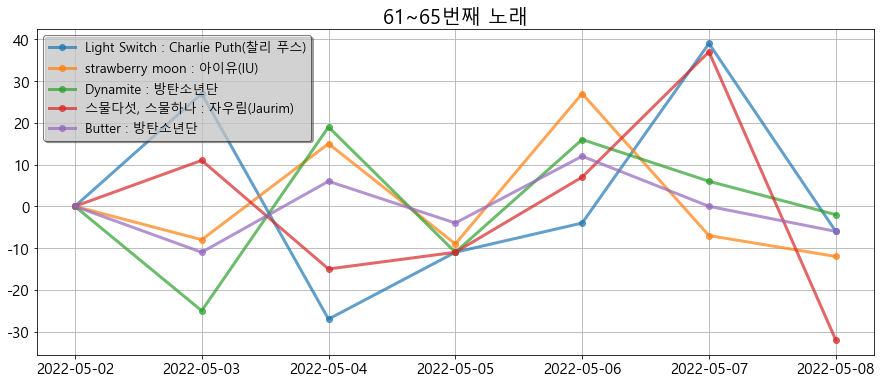

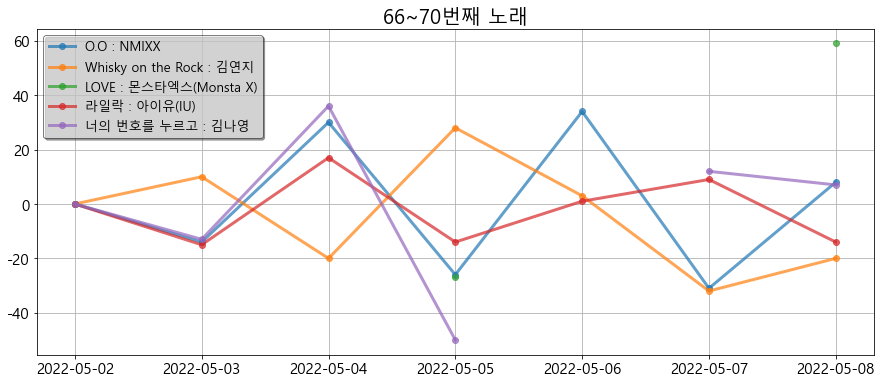

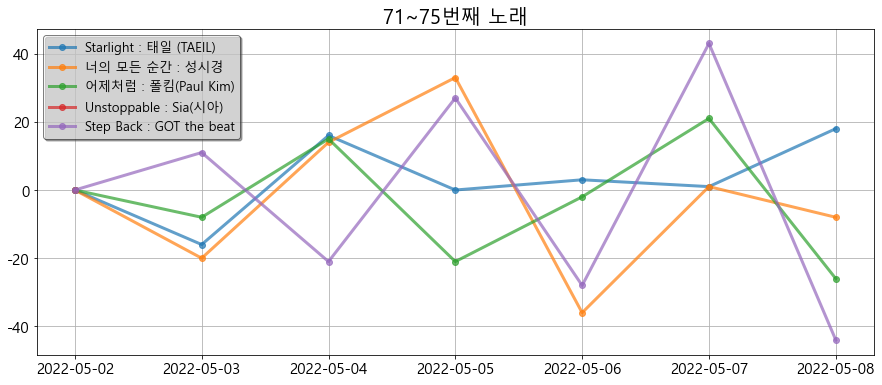

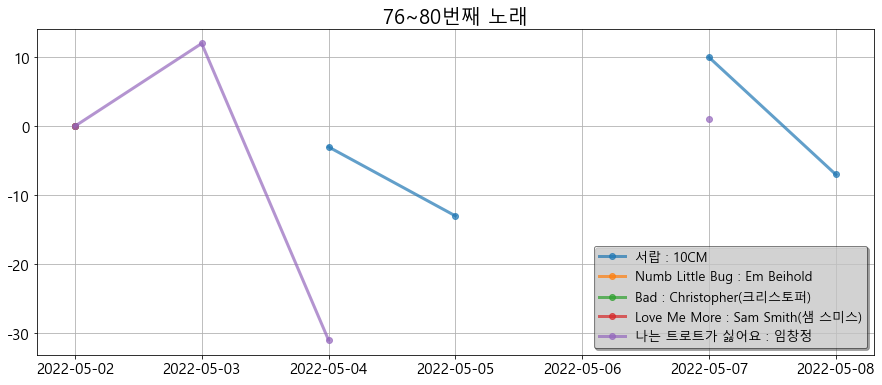

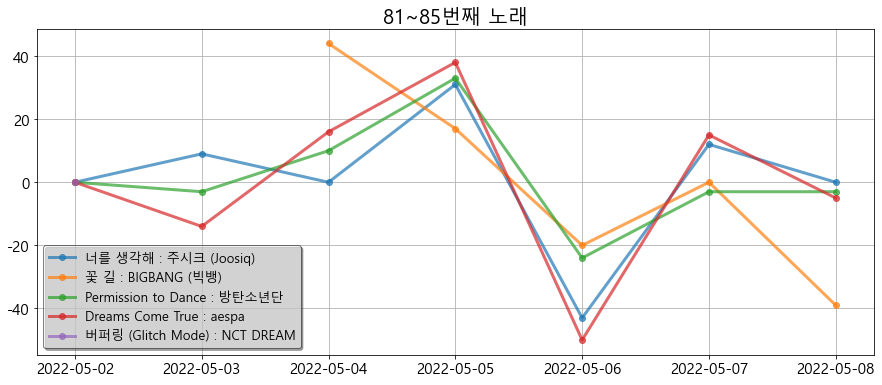

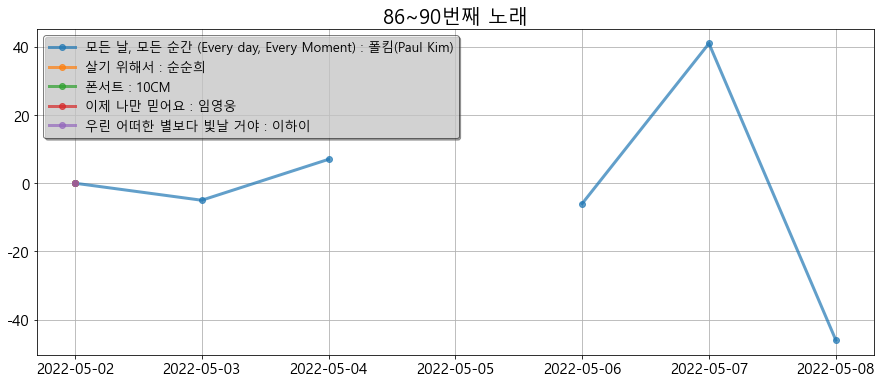

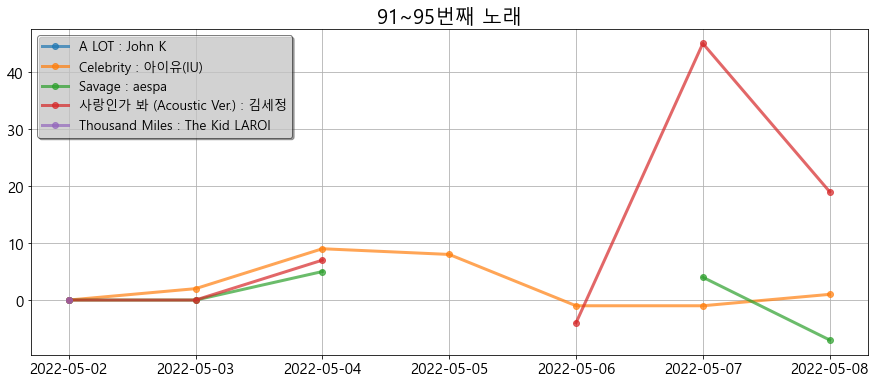

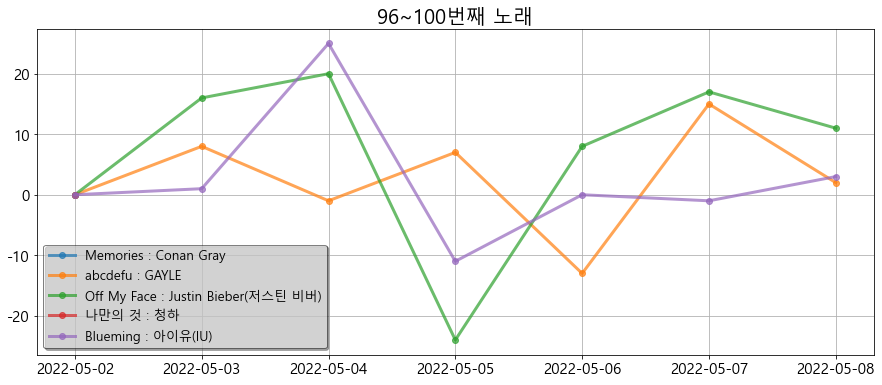

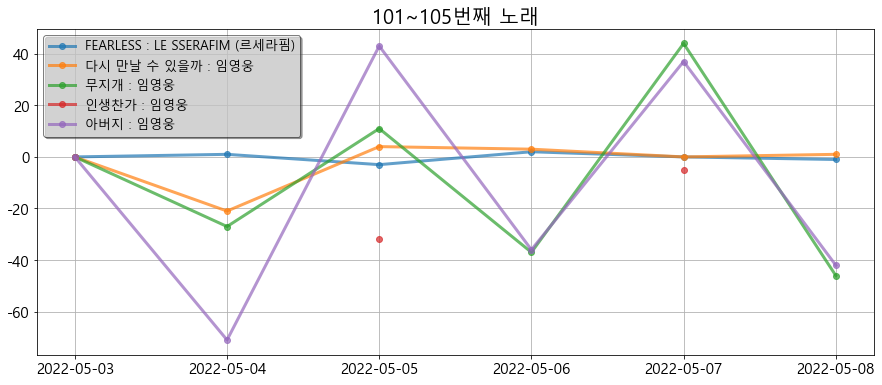

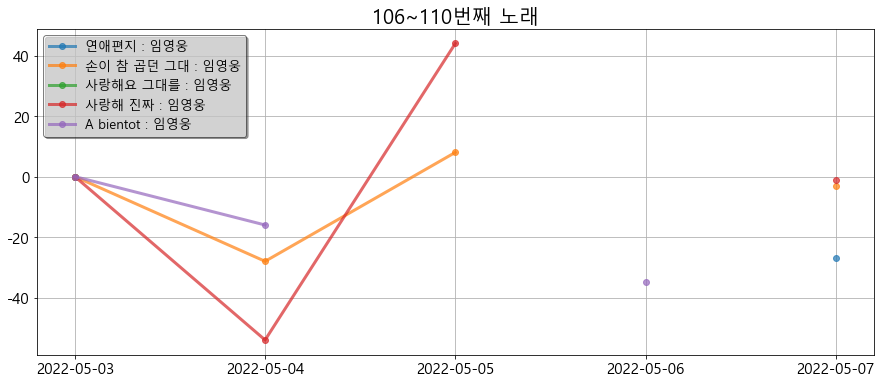

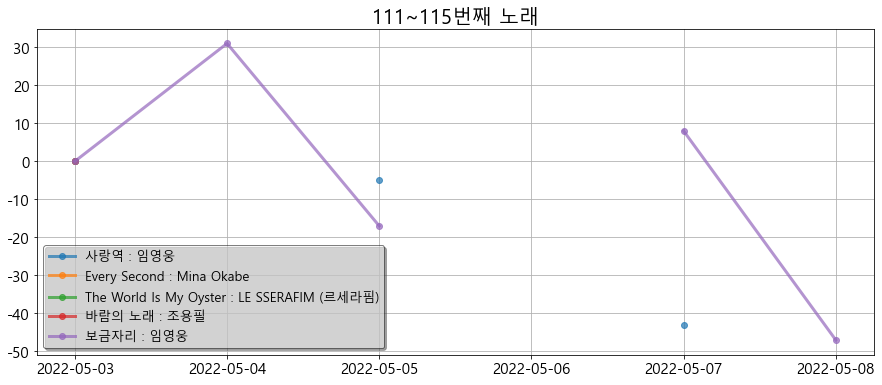

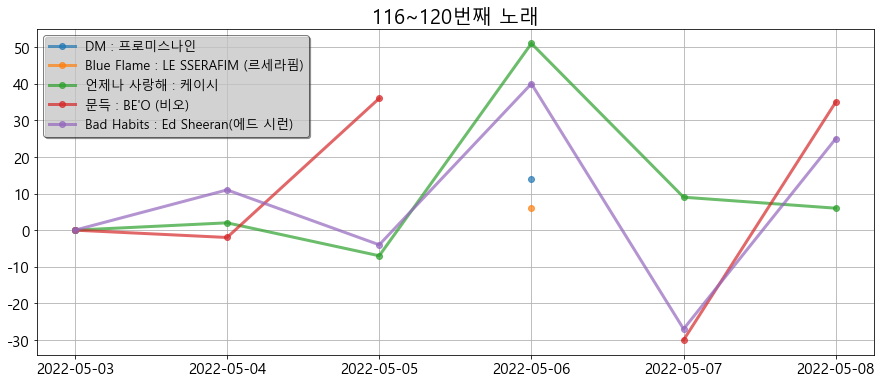

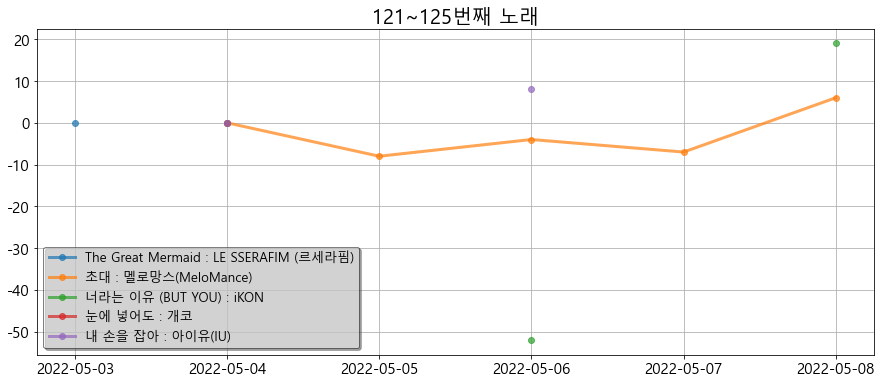

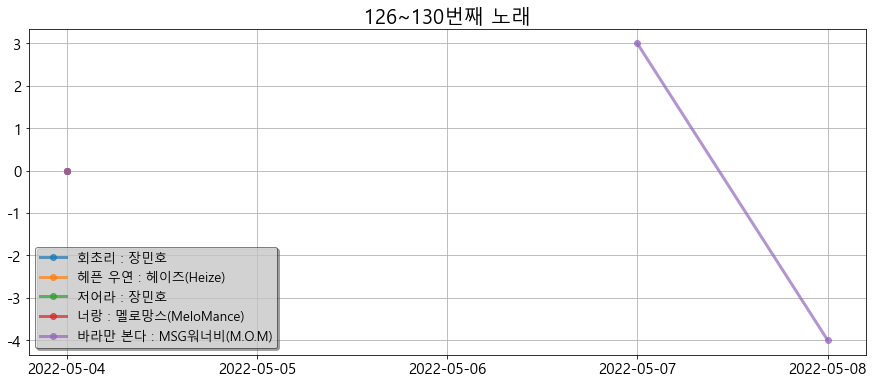

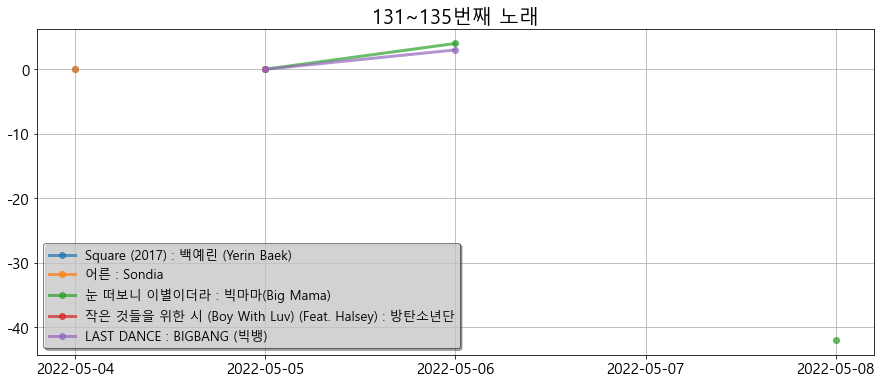

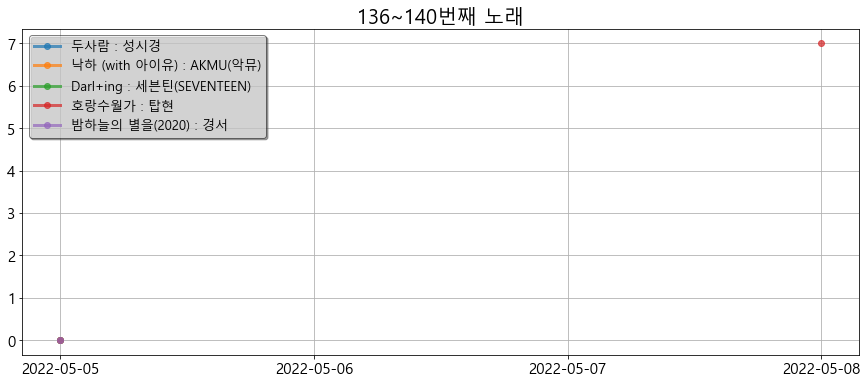

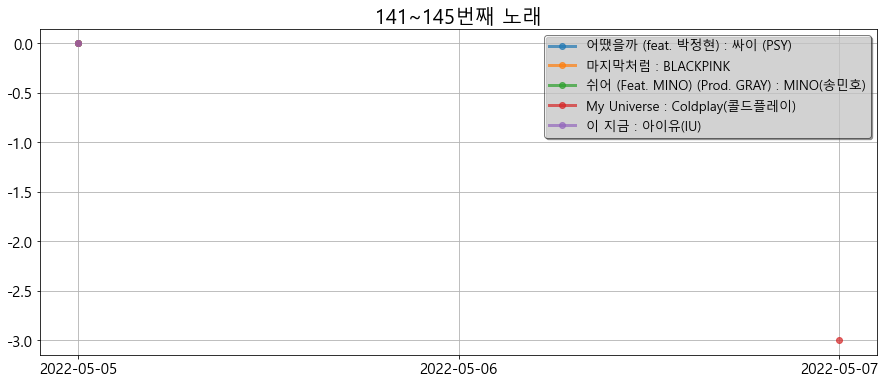

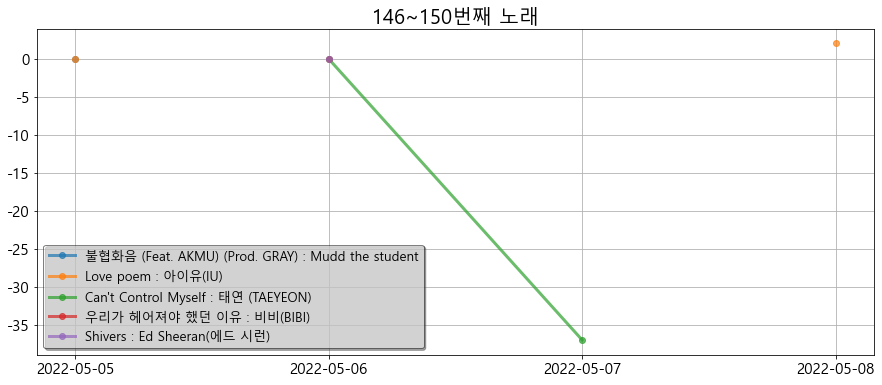

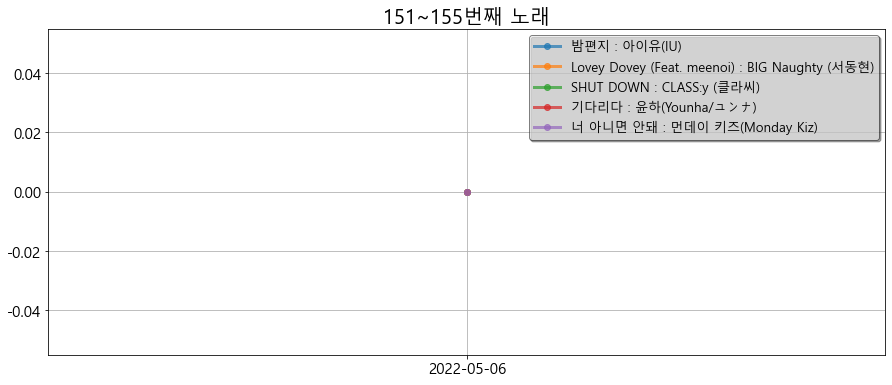

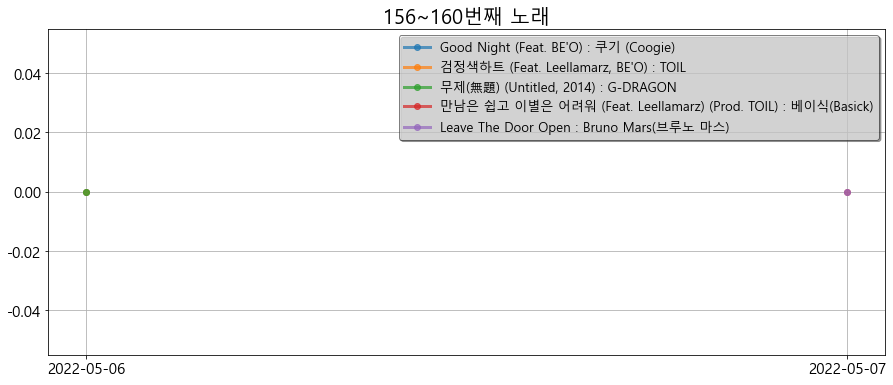

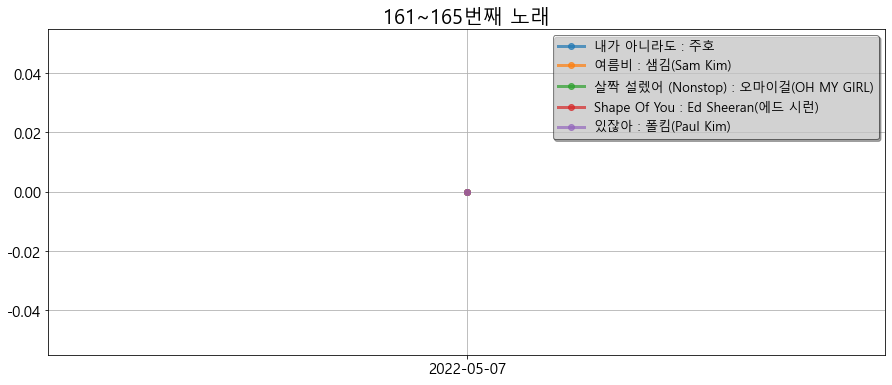

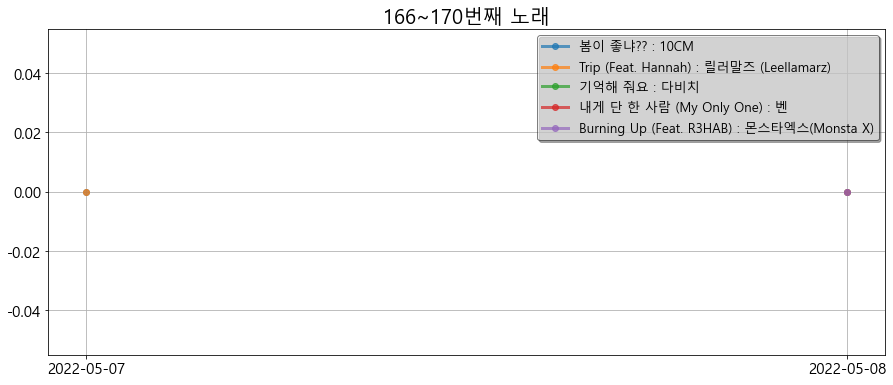

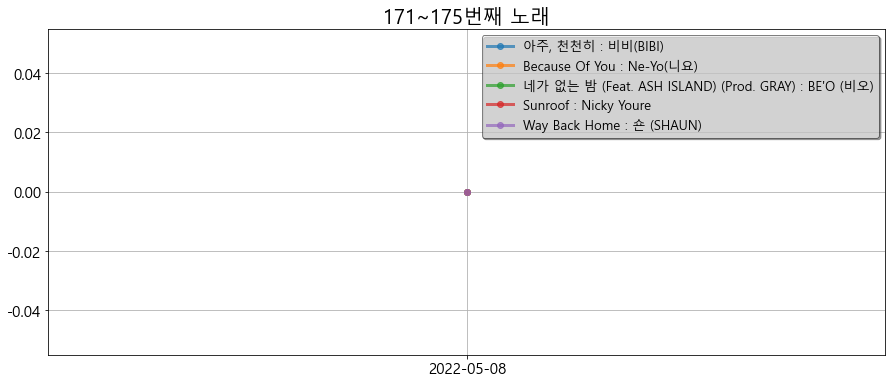

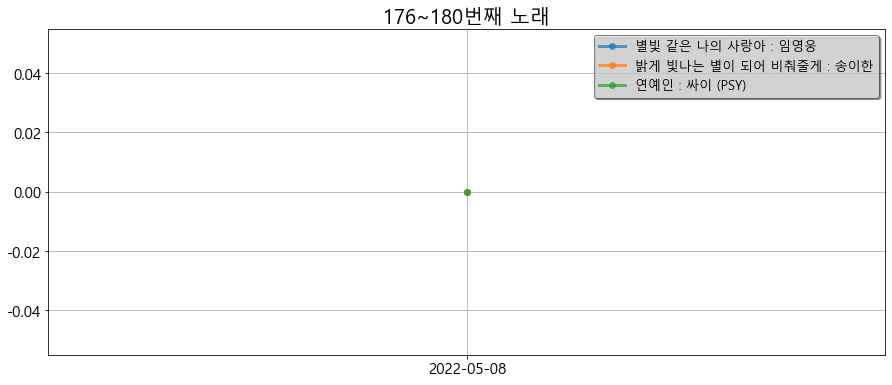

In [108]:
# 노래별 df, 노래 몇개씩 그래프에 나타날지 설정.
change_rank_graph(song_df_list, 5)

## 급등 음원 추출

### 모든 곡 데이터 병합

In [109]:
total_df = pd.DataFrame()
for one in song_df_list:
    total_df = pd.concat([total_df, one], ignore_index=True)

In [110]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1246 non-null   object 
 1   사이트     1246 non-null   object 
 2   순위      700 non-null    float64
 3   곡       1246 non-null   object 
 4   가수      1246 non-null   object 
 5   앨범      1246 non-null   object 
 6   소속사     1246 non-null   object 
 7   소속사_분류  1246 non-null   object 
 8   순위변동    700 non-null    float64
dtypes: float64(2), object(7)
memory usage: 87.7+ KB


In [114]:
total_df['순위변동'].describe()

count    700.000000
mean      -0.727143
std       16.119230
min      -71.000000
25%       -5.000000
50%        0.000000
75%        5.000000
max       59.000000
Name: 순위변동, dtype: float64

In [115]:
total_df[ total_df['순위변동'] > 0 ]['순위변동'].describe()

count    245.000000
mean      13.191837
std       12.131449
min        1.000000
25%        4.000000
50%        9.000000
75%       18.000000
max       59.000000
Name: 순위변동, dtype: float64

In [116]:
Q1 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.25)
Q3 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.75)
IQR = Q3 - Q1
u_outlier = Q3 + 1.5*IQR
print(Q1, Q3, IQR, u_outlier)

4.0 18.0 14.0 39.0


### 이상치 곡 추출

In [117]:
outlier_df = total_df[ total_df['순위변동'] > u_outlier ].drop_duplicates(['곡', '가수'], ignore_index=True)
outlier_df

날짜   사이트    순위                                      곡  \
0   2022-05-06  bugs  26.0                                 나의 월요일   
1   2022-05-08  bugs  20.0                              마지막 너의 인사   
2   2022-05-05  bugs  42.0          리무진 (Feat. MINO) (Prod. GRAY)   
3   2022-05-08  bugs  36.0                                   LOVE   
4   2022-05-07  bugs  43.0                              Step Back   
5   2022-05-04  bugs  38.0                                    꽃 길   
6   2022-05-07  bugs  49.0  모든 날, 모든 순간 (Every day, Every Moment)   
7   2022-05-07  bugs  46.0                 사랑인가 봐 (Acoustic Ver.)   
8   2022-05-07  bugs  31.0                                    무지개   
9   2022-05-05  bugs  52.0                                    아버지   
10  2022-05-05  bugs  56.0                                 사랑해 진짜   
11  2022-05-06  bugs  49.0                                언제나 사랑해   
12  2022-05-06  bugs  50.0                             Bad Habits   

                   가수                             앨범           소속사 소속사_분류  \
0            싸이 (PSY)                            싸다9      P NATION     기타   
1          헤이즈(Heize)            우리들의 블루스 OST Part 2      P NATION     기타   
2           BE'O (비오)             쇼미더머니 10 Episode 3            스윙     스윙   
3     몬스타엑스(Monsta X)                  SHAPE of LOVE           스타쉽    스타쉽   
4        GOT the beat                      Step Back            SM     SM   
5        BIGBANG (빅뱅)                            꽃 길            YG     YG   
6        폴킴(Paul Kim)        '키스 먼저 할까요?' OST Part.3  neuron music     기타   
7                 김세정  사랑인가 봐 (사내맞선 OST Bonus Track)     Jellyfish     기타   
8                 임영웅                        IM HERO         물고기뮤직     기타   
9                 임영웅                        IM HERO         물고기뮤직     기타   
10                임영웅                        IM HERO         물고기뮤직     기타   
11                케이시           조영수 리메이크 프로젝트 Part.2        NEXTAR     기타   
12  Ed Sheeran(에드 시런)                              0            해외     기타   

    순위변동  
0   40.0  
1   46.0  
2   54.0  
3   59.0  
4   43.0  
5   44.0  
6   41.0  
7   45.0  
8   44.0  
9   43.0  
10  44.0  
11  51.0  
12  40.0

In [118]:
# 이상치 곡 개수
print('이상치 곡의 개수 :', outlier_df.shape[0])

이상치 곡의 개수 : 13


### 급등 음원의 샘플 추출

In [120]:
big_change_title_list = outlier_df['곡'].tolist()
big_change_artist_list = outlier_df['가수'].tolist()
print('이상치 곡의 개수 :', len(big_change_title_list) )
print(big_change_title_list)
print('이상치 가수의 개수 :', len(big_change_title_list) )
print(big_change_artist_list)

이상치 곡의 개수 : 13
['나의 월요일', '마지막 너의 인사', '리무진 (Feat. MINO) (Prod. GRAY)', 'LOVE', 'Step Back', '꽃 길', '모든 날, 모든 순간 (Every day, Every Moment)', '사랑인가 봐 (Acoustic Ver.)', '무지개', '아버지', '사랑해 진짜', '언제나 사랑해', 'Bad Habits']
이상치 가수의 개수 : 13
['싸이 (PSY)', '헤이즈(Heize)', "BE'O (비오)", '몬스타엑스(Monsta X)', 'GOT the beat', 'BIGBANG (빅뱅)', '폴킴(Paul Kim)', '김세정', '임영웅', '임영웅', '임영웅', '케이시', 'Ed Sheeran(에드 시런)']


In [121]:
big_num = 2
temp = total_df[ (total_df['곡'] == big_change_title_list[big_num]) & (total_df['가수'] == big_change_artist_list[big_num]) ].reset_index(drop=True)
temp

날짜   사이트    순위                              곡         가수  \
0  2022-05-02  bugs  50.0  리무진 (Feat. MINO) (Prod. GRAY)  BE'O (비오)   
1  2022-05-03  bugs  65.0  리무진 (Feat. MINO) (Prod. GRAY)  BE'O (비오)   
2  2022-05-04  bugs  96.0  리무진 (Feat. MINO) (Prod. GRAY)  BE'O (비오)   
3  2022-05-05  bugs  42.0  리무진 (Feat. MINO) (Prod. GRAY)  BE'O (비오)   
4  2022-05-06  bugs   NaN  리무진 (Feat. MINO) (Prod. GRAY)  BE'O (비오)   
5  2022-05-07  bugs  74.0  리무진 (Feat. MINO) (Prod. GRAY)  BE'O (비오)   
6  2022-05-08  bugs  46.0  리무진 (Feat. MINO) (Prod. GRAY)  BE'O (비오)   

                   앨범 소속사 소속사_분류  순위변동  
0  쇼미더머니 10 Episode 3  스윙     스윙   0.0  
1  쇼미더머니 10 Episode 3  스윙     스윙 -15.0  
2  쇼미더머니 10 Episode 3  스윙     스윙 -31.0  
3  쇼미더머니 10 Episode 3  스윙     스윙  54.0  
4  쇼미더머니 10 Episode 3  스윙     스윙   NaN  
5  쇼미더머니 10 Episode 3  스윙     스윙 -32.0  
6  쇼미더머니 10 Episode 3  스윙     스윙  28.0

In [122]:
len(big_change_title_list[0])

6

In [123]:
big_change_title_list[0:1]

['나의 월요일']

In [124]:
len(big_change_title_list[0:1])

1

In [125]:
title = temp['곡'].value_counts().index[0]
title

'리무진 (Feat. MINO) (Prod. GRAY)'

In [126]:
artist = temp['가수'].value_counts().index[0]
artist

"BE'O (비오)"

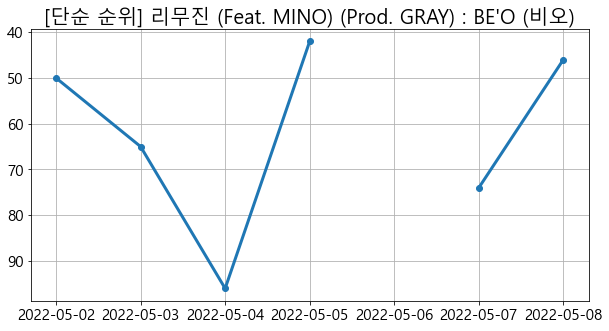

In [127]:
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.grid(True, zorder=1)
plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, zorder=2)
# plt.bar(temp['날짜'], temp['순위'], zorder=2, edgecolor='r', width=0.3, linestyle='-.', capstyle='round')
graph_title = '[단순 순위] ' + title + ' : ' + artist
plt.title(graph_title, fontdict={'size':20})
plt.xticks(temp['날짜'], fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### 이상치 곡 순위변동 평균

In [193]:
mean_change_list = []
for j in range( len(big_change_title_list) ):
        temp = total_df[ (total_df['곡'] == big_change_title_list[j]) & (total_df['가수'] == big_change_artist_list[j])].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        num = temp[temp['순위변동'] > 0 ].mean()['순위변동']
        row = temp.shape[0]
        temp['순위변동평균(양수)'] = num
        # 컬럼 자료가 온전히 있는 1행만 필요
        mean_change_list.append(temp)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_13308/3880598556.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  num = temp[temp['순위변동'] > 0 ].mean()['순위변동']


In [194]:
mean_change_list[0]

날짜   사이트    순위       곡        가수   앨범       소속사 소속사_분류  순위변동  \
0  2022-05-02  bugs  26.0  나의 월요일  싸이 (PSY)  싸다9  P NATION     기타   0.0   
1  2022-05-03  bugs  39.0  나의 월요일  싸이 (PSY)  싸다9  P NATION     기타 -13.0   
2  2022-05-04  bugs  94.0  나의 월요일  싸이 (PSY)  싸다9  P NATION     기타 -55.0   
3  2022-05-05  bugs  66.0  나의 월요일  싸이 (PSY)  싸다9  P NATION     기타  28.0   
4  2022-05-06  bugs  26.0  나의 월요일  싸이 (PSY)  싸다9  P NATION     기타  40.0   
5  2022-05-07  bugs   NaN  나의 월요일  싸이 (PSY)  싸다9  P NATION     기타   NaN   
6  2022-05-08  bugs   NaN  나의 월요일  싸이 (PSY)  싸다9  P NATION     기타   NaN   

   순위변동평균(양수)  
0        34.0  
1        34.0  
2        34.0  
3        34.0  
4        34.0  
5        34.0  
6        34.0

In [195]:
mean_change_list[1]

날짜   사이트    순위          곡          가수                   앨범  \
0  2022-05-02  bugs  37.0  마지막 너의 인사  헤이즈(Heize)  우리들의 블루스 OST Part 2   
1  2022-05-03  bugs  26.0  마지막 너의 인사  헤이즈(Heize)  우리들의 블루스 OST Part 2   
2  2022-05-04  bugs  19.0  마지막 너의 인사  헤이즈(Heize)  우리들의 블루스 OST Part 2   
3  2022-05-05  bugs  70.0  마지막 너의 인사  헤이즈(Heize)  우리들의 블루스 OST Part 2   
4  2022-05-06  bugs  34.0  마지막 너의 인사  헤이즈(Heize)  우리들의 블루스 OST Part 2   
5  2022-05-07  bugs  66.0  마지막 너의 인사  헤이즈(Heize)  우리들의 블루스 OST Part 2   
6  2022-05-08  bugs  20.0  마지막 너의 인사  헤이즈(Heize)  우리들의 블루스 OST Part 2   

        소속사 소속사_분류  순위변동  순위변동평균(양수)  
0  P NATION     기타   0.0        25.0  
1  P NATION     기타  11.0        25.0  
2  P NATION     기타   7.0        25.0  
3  P NATION     기타 -51.0        25.0  
4  P NATION     기타  36.0        25.0  
5  P NATION     기타 -32.0        25.0  
6  P NATION     기타  46.0        25.0

In [196]:
mean_change_list[0].iloc[0:1, :]

날짜   사이트    순위       곡        가수   앨범       소속사 소속사_분류  순위변동  \
0  2022-05-02  bugs  26.0  나의 월요일  싸이 (PSY)  싸다9  P NATION     기타   0.0   

   순위변동평균(양수)  
0        34.0

In [197]:
mean_change_list[-1]

날짜   사이트    순위           곡                 가수 앨범 소속사 소속사_분류  순위변동  \
0  2022-05-02  bugs   NaN  Bad Habits  Ed Sheeran(에드 시런)  0  해외     기타   NaN   
1  2022-05-03  bugs  97.0  Bad Habits  Ed Sheeran(에드 시런)  0  해외     기타   0.0   
2  2022-05-04  bugs  86.0  Bad Habits  Ed Sheeran(에드 시런)  0  해외     기타  11.0   
3  2022-05-05  bugs  90.0  Bad Habits  Ed Sheeran(에드 시런)  0  해외     기타  -4.0   
4  2022-05-06  bugs  50.0  Bad Habits  Ed Sheeran(에드 시런)  0  해외     기타  40.0   
5  2022-05-07  bugs  77.0  Bad Habits  Ed Sheeran(에드 시런)  0  해외     기타 -27.0   
6  2022-05-08  bugs  52.0  Bad Habits  Ed Sheeran(에드 시런)  0  해외     기타  25.0   

   순위변동평균(양수)  
0   25.333333  
1   25.333333  
2   25.333333  
3   25.333333  
4   25.333333  
5   25.333333  
6   25.333333

In [198]:
mean_outlier_df = pd.DataFrame()
for one in mean_change_list:
    temp = one.iloc[0:1, :]
    mean_outlier_df = pd.concat([mean_outlier_df, temp], ignore_index=True)

In [199]:
mean_outlier_df.head()

날짜   사이트    순위                              곡               가수  \
0  2022-05-02  bugs  26.0                         나의 월요일         싸이 (PSY)   
1  2022-05-02  bugs  37.0                      마지막 너의 인사       헤이즈(Heize)   
2  2022-05-02  bugs  50.0  리무진 (Feat. MINO) (Prod. GRAY)        BE'O (비오)   
3  2022-05-02  bugs  68.0                           LOVE  몬스타엑스(Monsta X)   
4  2022-05-02  bugs  75.0                      Step Back     GOT the beat   

                    앨범       소속사 소속사_분류  순위변동  순위변동평균(양수)  
0                  싸다9  P NATION     기타   0.0        34.0  
1  우리들의 블루스 OST Part 2  P NATION     기타   0.0        25.0  
2   쇼미더머니 10 Episode 3        스윙     스윙   0.0        41.0  
3        SHAPE of LOVE       스타쉽    스타쉽   0.0        59.0  
4            Step Back        SM     SM   0.0        27.0

In [200]:
mean_outlier_df.tail()

날짜   사이트  순위           곡                 가수                    앨범  \
8   2022-05-02  bugs NaN         무지개                임영웅               IM HERO   
9   2022-05-02  bugs NaN         아버지                임영웅               IM HERO   
10  2022-05-02  bugs NaN      사랑해 진짜                임영웅               IM HERO   
11  2022-05-02  bugs NaN     언제나 사랑해                케이시  조영수 리메이크 프로젝트 Part.2   
12  2022-05-02  bugs NaN  Bad Habits  Ed Sheeran(에드 시런)                     0   

       소속사 소속사_분류  순위변동  순위변동평균(양수)  
8    물고기뮤직     기타   NaN   27.500000  
9    물고기뮤직     기타   NaN   40.000000  
10   물고기뮤직     기타   NaN   44.000000  
11  NEXTAR     기타   NaN   17.000000  
12      해외     기타   NaN   25.333333

In [201]:
mod_start_date = start_date.replace('-','')
mod_end_date = end_date.replace('-','')

path = f'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}/{site_name}/'
os.makedirs(path, exist_ok=True)

In [202]:
# 이상치 곡 평균 df 출력
mean_outlier_df.to_excel(path + f'[{site_name}]{mod_start_date}_{mod_end_date}_mean_outliers.xlsx', index=False)
print(f'[{site_name}]{mod_start_date}_{mod_end_date}_mean_outliers.xlsx 출력')

[bugs]20220502_20220508_mean_outliers.xlsx 출력


##### 그래프

In [211]:
import seaborn as sns

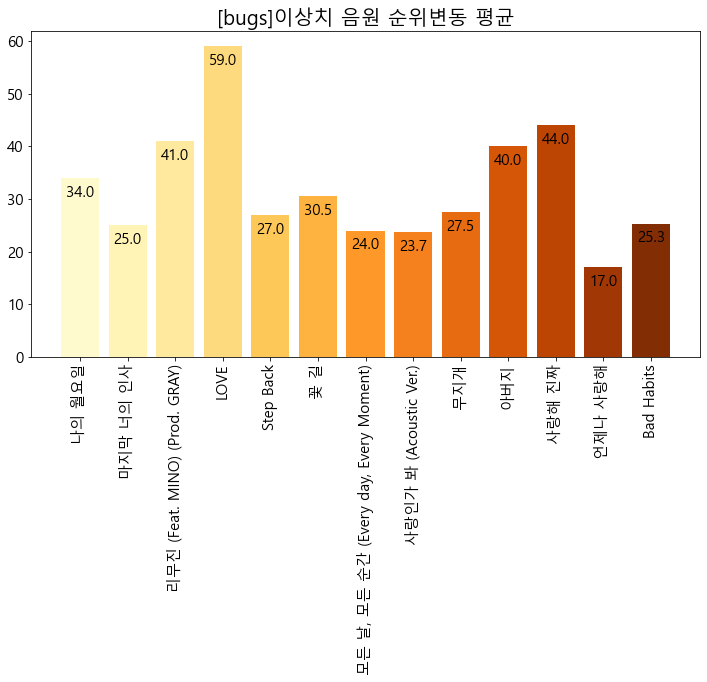

In [215]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette('YlOrBr', mean_outlier_df.shape[0])
plt.bar('곡', '순위변동평균(양수)', data=mean_outlier_df, color=colors)
plt.title(f'[{site_name}]이상치 음원 순위변동 평균', fontdict={'size':20})
for i in range(mean_outlier_df.shape[0]):
    plt.text(i, mean_outlier_df['순위변동평균(양수)'][i] - mean_outlier_df.shape[0]*0.1, round(mean_outlier_df['순위변동평균(양수)'][i], 1), verticalalignment='top', horizontalalignment='center', fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15);

### 이상치 곡의 순위 그래프

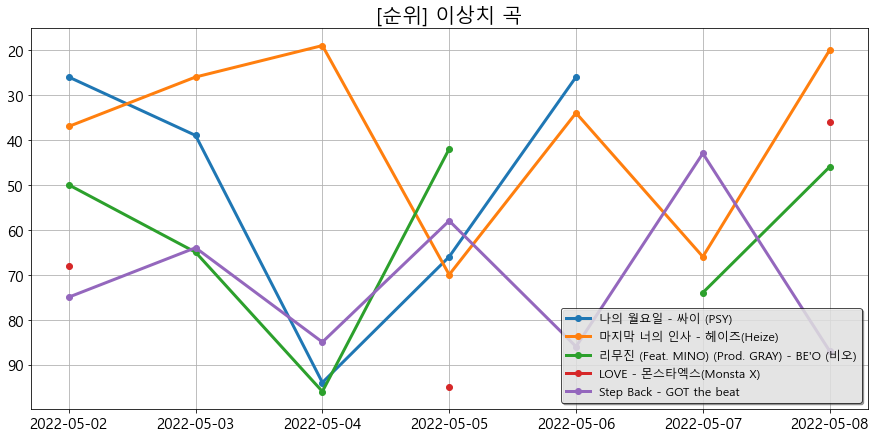

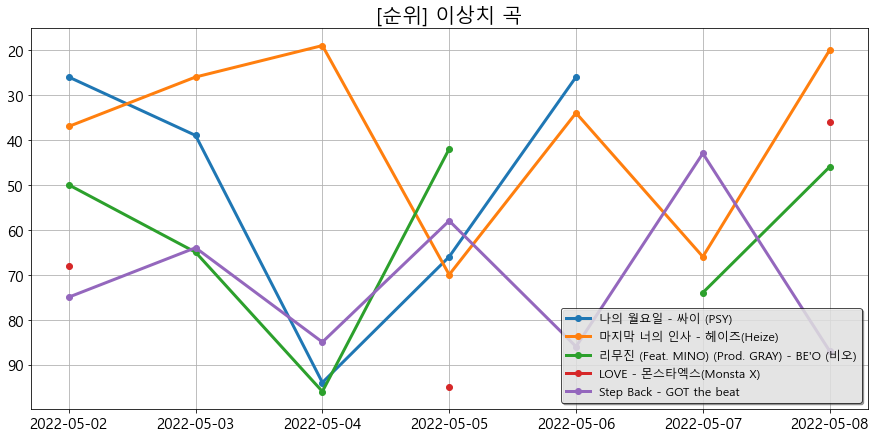

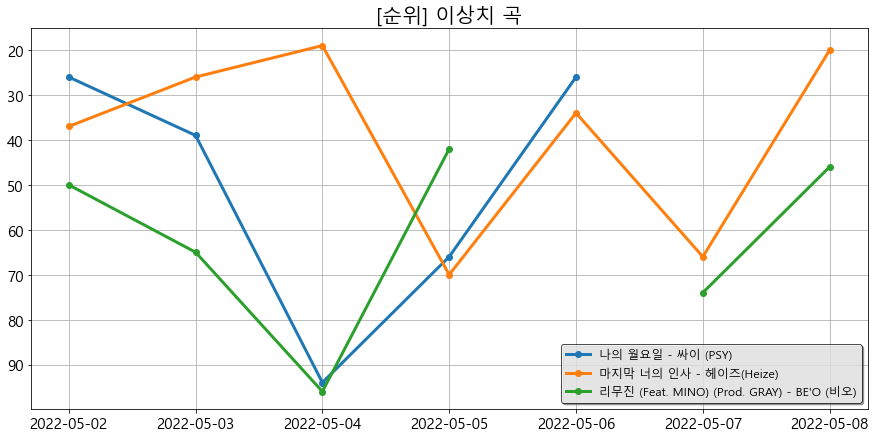

In [147]:
num = 5
for i in range( math.ceil(len(big_change_title_list)/num) ):
    plt.figure(figsize=(15,7))
    ax = plt.axes()
    ax.invert_yaxis()
    plt.grid(True)
    for j in range( len(big_change_title_list[i*num:(i+1)*num]) ):
        temp = total_df[ (total_df['곡'] == big_change_title_list[j]) & (total_df['가수'] == big_change_artist_list[j])].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        song_label = title + ' - ' + artist
        plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, label=song_label)
        plt.title('[순위] 이상치 곡', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
    img_name = f'[{site_name}]{start_date}_{end_date}_[순위]이상치{i+1}.png'
    plt.savefig(path + img_name)

### 이상치 곡의 순위변동 그래프

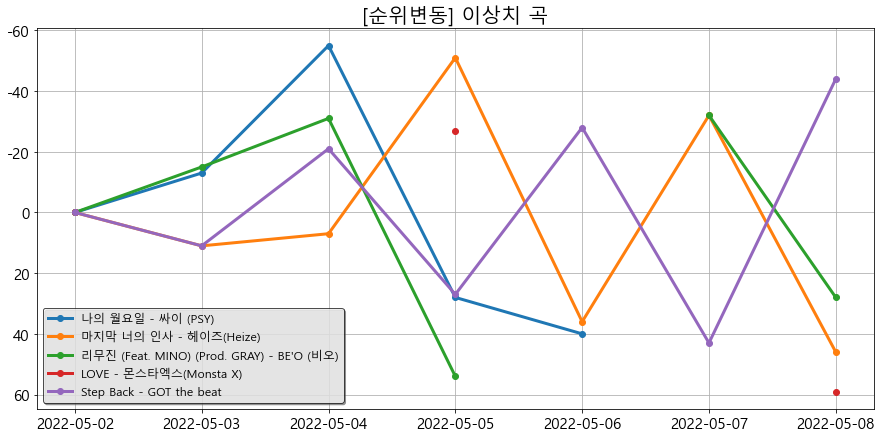

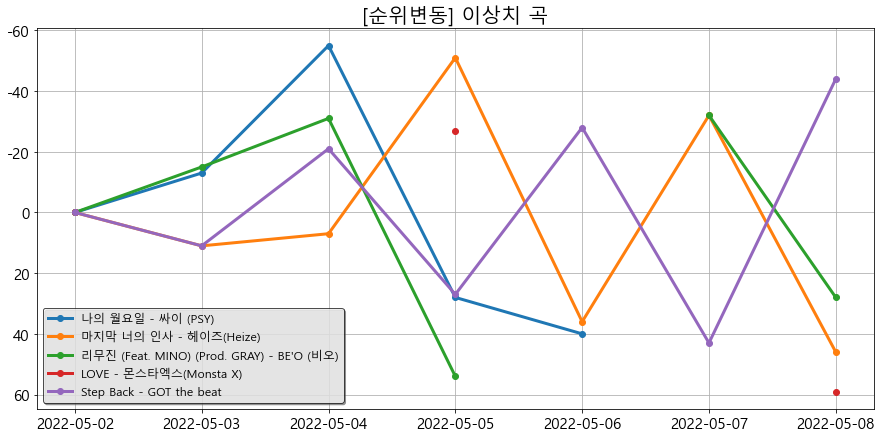

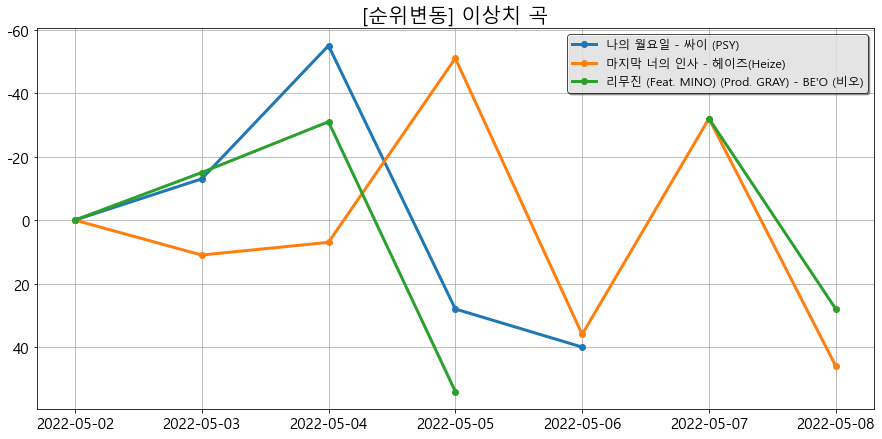

In [148]:
num = 5
for i in range( math.ceil(len(big_change_title_list)/num) ):
    plt.figure(figsize=(15,7))
    ax = plt.axes()
    ax.invert_yaxis()
    plt.grid(True)
    for j in range( len(big_change_title_list[i*num:(i+1)*num]) ):
        temp = total_df[ (total_df['곡'] == big_change_title_list[j]) & (total_df['가수'] == big_change_artist_list[j])].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        song_label = title + ' - ' + artist
        plt.plot(temp['날짜'], temp['순위변동'], '-o', linewidth=3, label=song_label)
        plt.title('[순위변동] 이상치 곡', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
    img_name = f'[{site_name}]{start_date}_{end_date}_[순위변동]이상치{i+1}.png'
    plt.savefig(path + img_name)

## 이상치 곡의 구글 트랜드 분석

In [161]:
try:
    os.chdir(code_path)
except:
    pass

In [162]:
ca.install(True)
driver = webdriver.Chrome()

## 구글 트렌드 정리

In [163]:
start_date, end_date

('2022-05-02', '2022-05-08')

In [164]:
temp['곡'].unique()[0].replace(' ', '_')

'나의_월요일'

In [165]:
for j in range(len(big_change_title_list)):
    temp = total_df[ (total_df['곡'] == big_change_title_list[j]) & (total_df['가수'] == big_change_artist_list[j])].reset_index(drop=True)
    title = temp['곡'].value_counts().index[0]
    artist = temp['가수'].value_counts().index[0]
    
    # 구글 트렌트 접속
    url = 'https://trends.google.co.kr/trends/?geo=KR'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()
    # 검색어 입력
    search_box = driver.find_elements_by_css_selector('input')[1]
    search_box.clear()
    search_box.send_keys(title)
    time.sleep(0.5)
    search_box.send_keys(Keys.ENTER)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1.5, 2) )
    
    # csv 파일 다운
    driver.find_element_by_css_selector('button.widget-actions-item.export').click()
    time.sleep( random.uniform(1, 1.5) )

    # 파일 이름 변경
    search_artist = temp['가수'].unique()[0].replace(' ', '_')
    search_title = temp['곡'].unique()[0].replace(' ', '_')
    today_date = datetime.today().strftime('%Y%m%d_%H%M%S')
    file_oldname = os.path.join('C:/Users/kbjung/Downloads', 'multiTimeline.csv')
    file_newname = os.path.join('C:/Users/kbjung/Downloads', f'[{site_name}]{today_date}_{search_title}-{search_artist}.csv')
    os.rename(file_oldname, file_newname)
    time.sleep(2)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_13308/2122951776.py:13: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  search_box = driver.find_elements_by_css_selector('input')[1]
C:\Users\kbjung\AppData\Local\Temp/ipykernel_13308/2122951776.py:22: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('button.widget-actions-item.export').click()


In [166]:
driver.quit()

### 파일 이동

In [167]:
try:
    os.chdir('C:/Users/kbjung/Downloads')
except:
    pass

In [168]:
os.listdir()

['(주)원트리즈뮤직 비상연락망 (220510).xlsx',
 '(주)원트리즈뮤직_휴가계(양식).doc',
 'Anaconda3-2021.05-Windows-x86_64.exe',
 'Anaconda3-2021.11-Windows-x86_64.exe',
 'D2Coding.ttf',
 'datalab_plots_20220509',
 'desktop.ini',
 'DiscordSetup.exe',
 'LanguageFile_ko-KR_Kim Y. Ch. + CJW Patch_2.xml',
 'SumatraPDF-3.3.3-64-install.exe',
 'VSCodeUserSetup-x64-1.66.1.exe',
 '[bugs]20220511_130633_나의_월요일-싸이_(PSY).csv',
 '[bugs]20220511_130641_마지막_너의_인사-헤이즈(Heize).csv',
 "[bugs]20220511_130649_리무진_(Feat._MINO)_(Prod._GRAY)-BE'O_(비오).csv",
 '[bugs]20220511_130657_LOVE-몬스타엑스(Monsta_X).csv',
 '[bugs]20220511_130704_Step_Back-GOT_the_beat.csv',
 '[bugs]20220511_130712_꽃_길-BIGBANG_(빅뱅).csv',
 '[bugs]20220511_130720_모든_날,_모든_순간_(Every_day,_Every_Moment)-폴킴(Paul_Kim).csv',
 '[bugs]20220511_130728_사랑인가_봐_(Acoustic_Ver.)-김세정.csv',
 '[bugs]20220511_130736_무지개-임영웅.csv',
 '[bugs]20220511_130744_아버지-임영웅.csv',
 '[bugs]20220511_130752_사랑해_진짜-임영웅.csv',
 '[bugs]20220511_130800_언제나_사랑해-케이시.csv',
 '[bugs]20220511_130809_Bad_Habits-Ed_S

In [169]:
csv_file_list = glob.glob('*.csv')
csv_file_list

['[bugs]20220511_130633_나의_월요일-싸이_(PSY).csv',
 '[bugs]20220511_130641_마지막_너의_인사-헤이즈(Heize).csv',
 "[bugs]20220511_130649_리무진_(Feat._MINO)_(Prod._GRAY)-BE'O_(비오).csv",
 '[bugs]20220511_130657_LOVE-몬스타엑스(Monsta_X).csv',
 '[bugs]20220511_130704_Step_Back-GOT_the_beat.csv',
 '[bugs]20220511_130712_꽃_길-BIGBANG_(빅뱅).csv',
 '[bugs]20220511_130720_모든_날,_모든_순간_(Every_day,_Every_Moment)-폴킴(Paul_Kim).csv',
 '[bugs]20220511_130728_사랑인가_봐_(Acoustic_Ver.)-김세정.csv',
 '[bugs]20220511_130736_무지개-임영웅.csv',
 '[bugs]20220511_130744_아버지-임영웅.csv',
 '[bugs]20220511_130752_사랑해_진짜-임영웅.csv',
 '[bugs]20220511_130800_언제나_사랑해-케이시.csv',
 '[bugs]20220511_130809_Bad_Habits-Ed_Sheeran(에드_시런).csv']

In [170]:
path

'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/2022-05-02_2022-05-08/bugs/'

In [171]:
for file in csv_file_list:
    des = path + file
    shutil.move(file, des)

### 이상치 노래 그래프

In [172]:
try:
    os.chdir(path)
except:
    pass

In [173]:
os.listdir()

['[bugs]2022-05-02_2022-05-08_[순위]이상치1.png',
 '[bugs]2022-05-02_2022-05-08_[순위]이상치2.png',
 '[bugs]2022-05-02_2022-05-08_[순위]이상치3.png',
 '[bugs]2022-05-02_2022-05-08_[순위변동]이상치1.png',
 '[bugs]2022-05-02_2022-05-08_[순위변동]이상치2.png',
 '[bugs]2022-05-02_2022-05-08_[순위변동]이상치3.png',
 '[bugs]20220502_20220508_mean_outliers.xlsx',
 '[bugs]20220502_20220508_outliers.xlsx',
 '[bugs]20220511_130633_나의_월요일-싸이_(PSY).csv',
 '[bugs]20220511_130641_마지막_너의_인사-헤이즈(Heize).csv',
 "[bugs]20220511_130649_리무진_(Feat._MINO)_(Prod._GRAY)-BE'O_(비오).csv",
 '[bugs]20220511_130657_LOVE-몬스타엑스(Monsta_X).csv',
 '[bugs]20220511_130704_Step_Back-GOT_the_beat.csv',
 '[bugs]20220511_130712_꽃_길-BIGBANG_(빅뱅).csv',
 '[bugs]20220511_130720_모든_날,_모든_순간_(Every_day,_Every_Moment)-폴킴(Paul_Kim).csv',
 '[bugs]20220511_130728_사랑인가_봐_(Acoustic_Ver.)-김세정.csv',
 '[bugs]20220511_130736_무지개-임영웅.csv',
 '[bugs]20220511_130744_아버지-임영웅.csv',
 '[bugs]20220511_130752_사랑해_진짜-임영웅.csv',
 '[bugs]20220511_130800_언제나_사랑해-케이시.csv',
 '[bugs]20220511_130

In [174]:
goo_file_list = glob.glob('*.csv')
goo_file_list

['[bugs]20220511_130633_나의_월요일-싸이_(PSY).csv',
 '[bugs]20220511_130641_마지막_너의_인사-헤이즈(Heize).csv',
 "[bugs]20220511_130649_리무진_(Feat._MINO)_(Prod._GRAY)-BE'O_(비오).csv",
 '[bugs]20220511_130657_LOVE-몬스타엑스(Monsta_X).csv',
 '[bugs]20220511_130704_Step_Back-GOT_the_beat.csv',
 '[bugs]20220511_130712_꽃_길-BIGBANG_(빅뱅).csv',
 '[bugs]20220511_130720_모든_날,_모든_순간_(Every_day,_Every_Moment)-폴킴(Paul_Kim).csv',
 '[bugs]20220511_130728_사랑인가_봐_(Acoustic_Ver.)-김세정.csv',
 '[bugs]20220511_130736_무지개-임영웅.csv',
 '[bugs]20220511_130744_아버지-임영웅.csv',
 '[bugs]20220511_130752_사랑해_진짜-임영웅.csv',
 '[bugs]20220511_130800_언제나_사랑해-케이시.csv',
 '[bugs]20220511_130809_Bad_Habits-Ed_Sheeran(에드_시런).csv']

# 코드 마지막